In [64]:
import numpy as np
import seaborn as sns
import iso639
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300


In [70]:
def lang_sims_heatmap(lang_sims_dict, params):
    model_langs = list(lang_sims_dict.keys())
    model_langs.sort()

    for param in params:
        cos_sims_heatmap = np.empty((len(model_langs), len(model_langs)))
        cos_sims_heatmap.fill(np.nan)

        for i, lang1 in enumerate(model_langs):
            for j, lang2 in enumerate(model_langs):
                if lang1 in lang_sims_dict and lang2 in lang_sims_dict[lang1]:
                    #print(lang1, lang2, lang_sims_dict[lang1][lang2]["all"])
                    cos_sims_heatmap[i][j] = lang_sims_dict[lang1][lang2][param]

        sns.heatmap(cos_sims_heatmap, xticklabels=model_langs, yticklabels=model_langs, cbar_kws={'label': 'Cosine Similarity (all params)'})
        plt.xticks(fontsize=5.5)
        plt.yticks(fontsize=5.5)
        plt.gcf().set_size_inches(9, 8)
        plt.gca().invert_yaxis()
        plt.title(f"Language task vector similarities (param = {param})")
        plt.show()


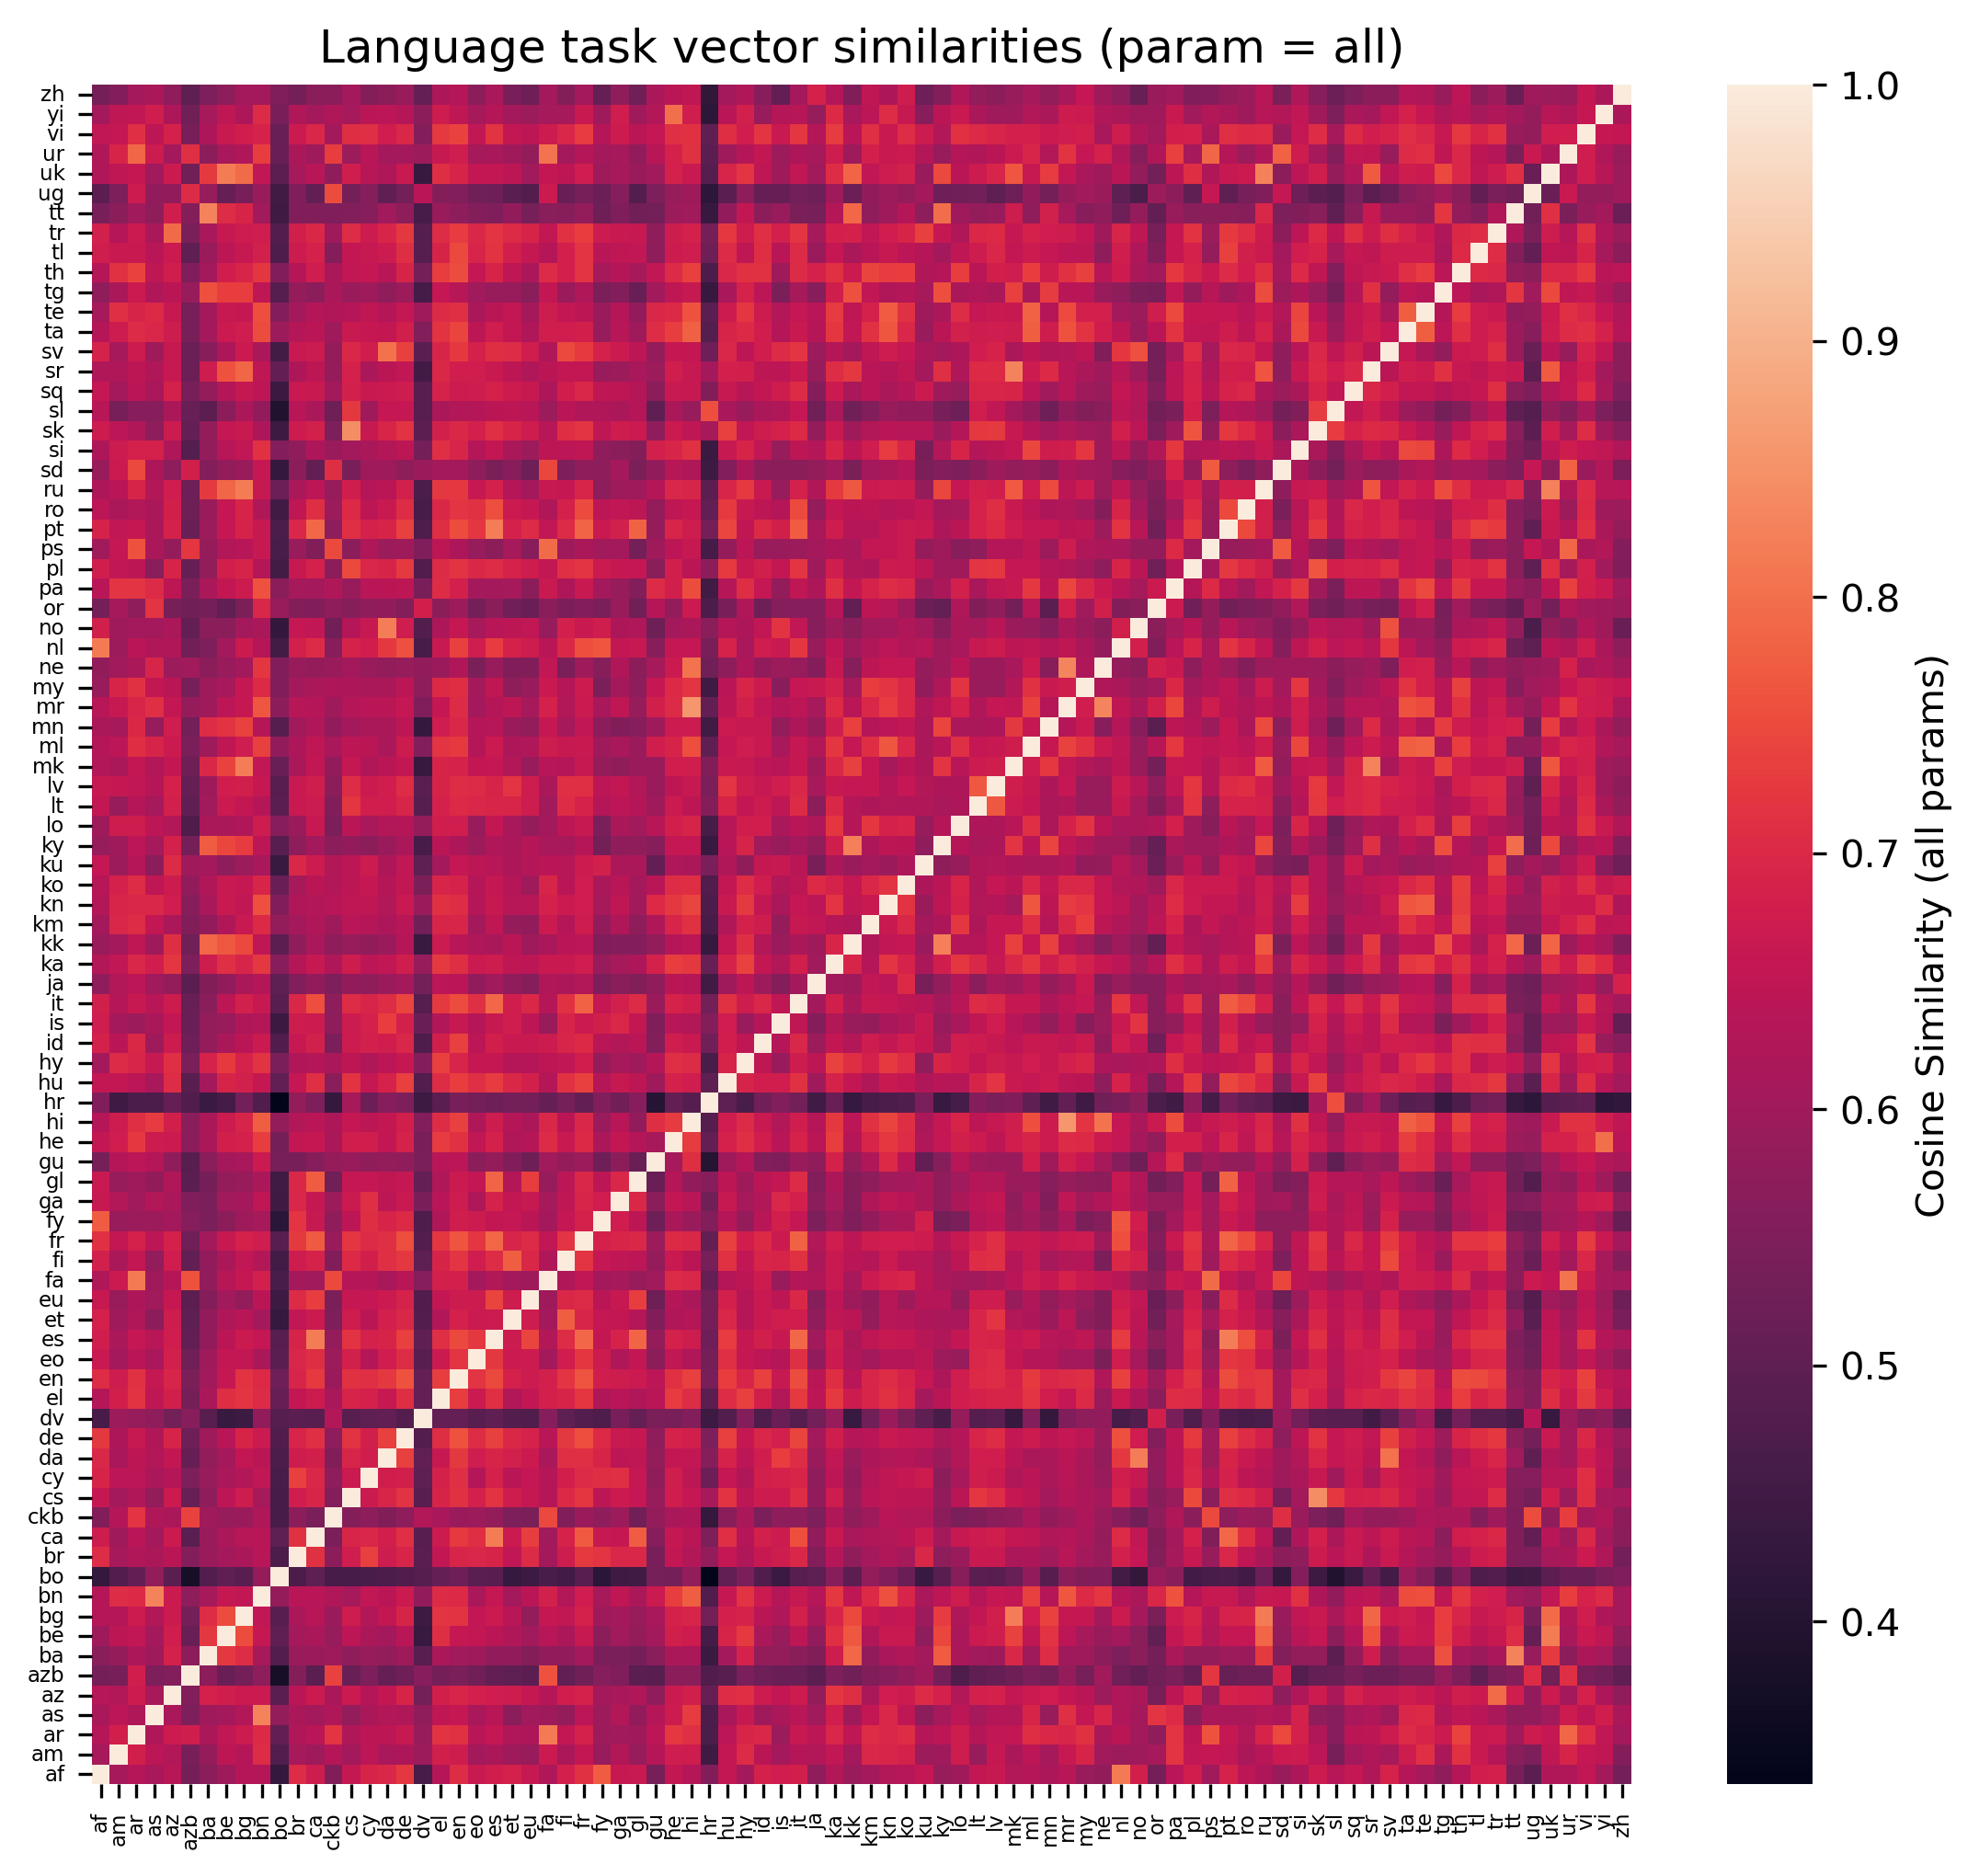

In [71]:
mt5_small_lang_cos_sims = np.load("mt5-small_lang_all_param_cos_sims.npy", allow_pickle=True).item()
lang_sims_heatmap(mt5_small_lang_cos_sims, ["all"])

Text(0.5, 1.0, 'Language task vectors with highest similarity to Yiddish (all params)')

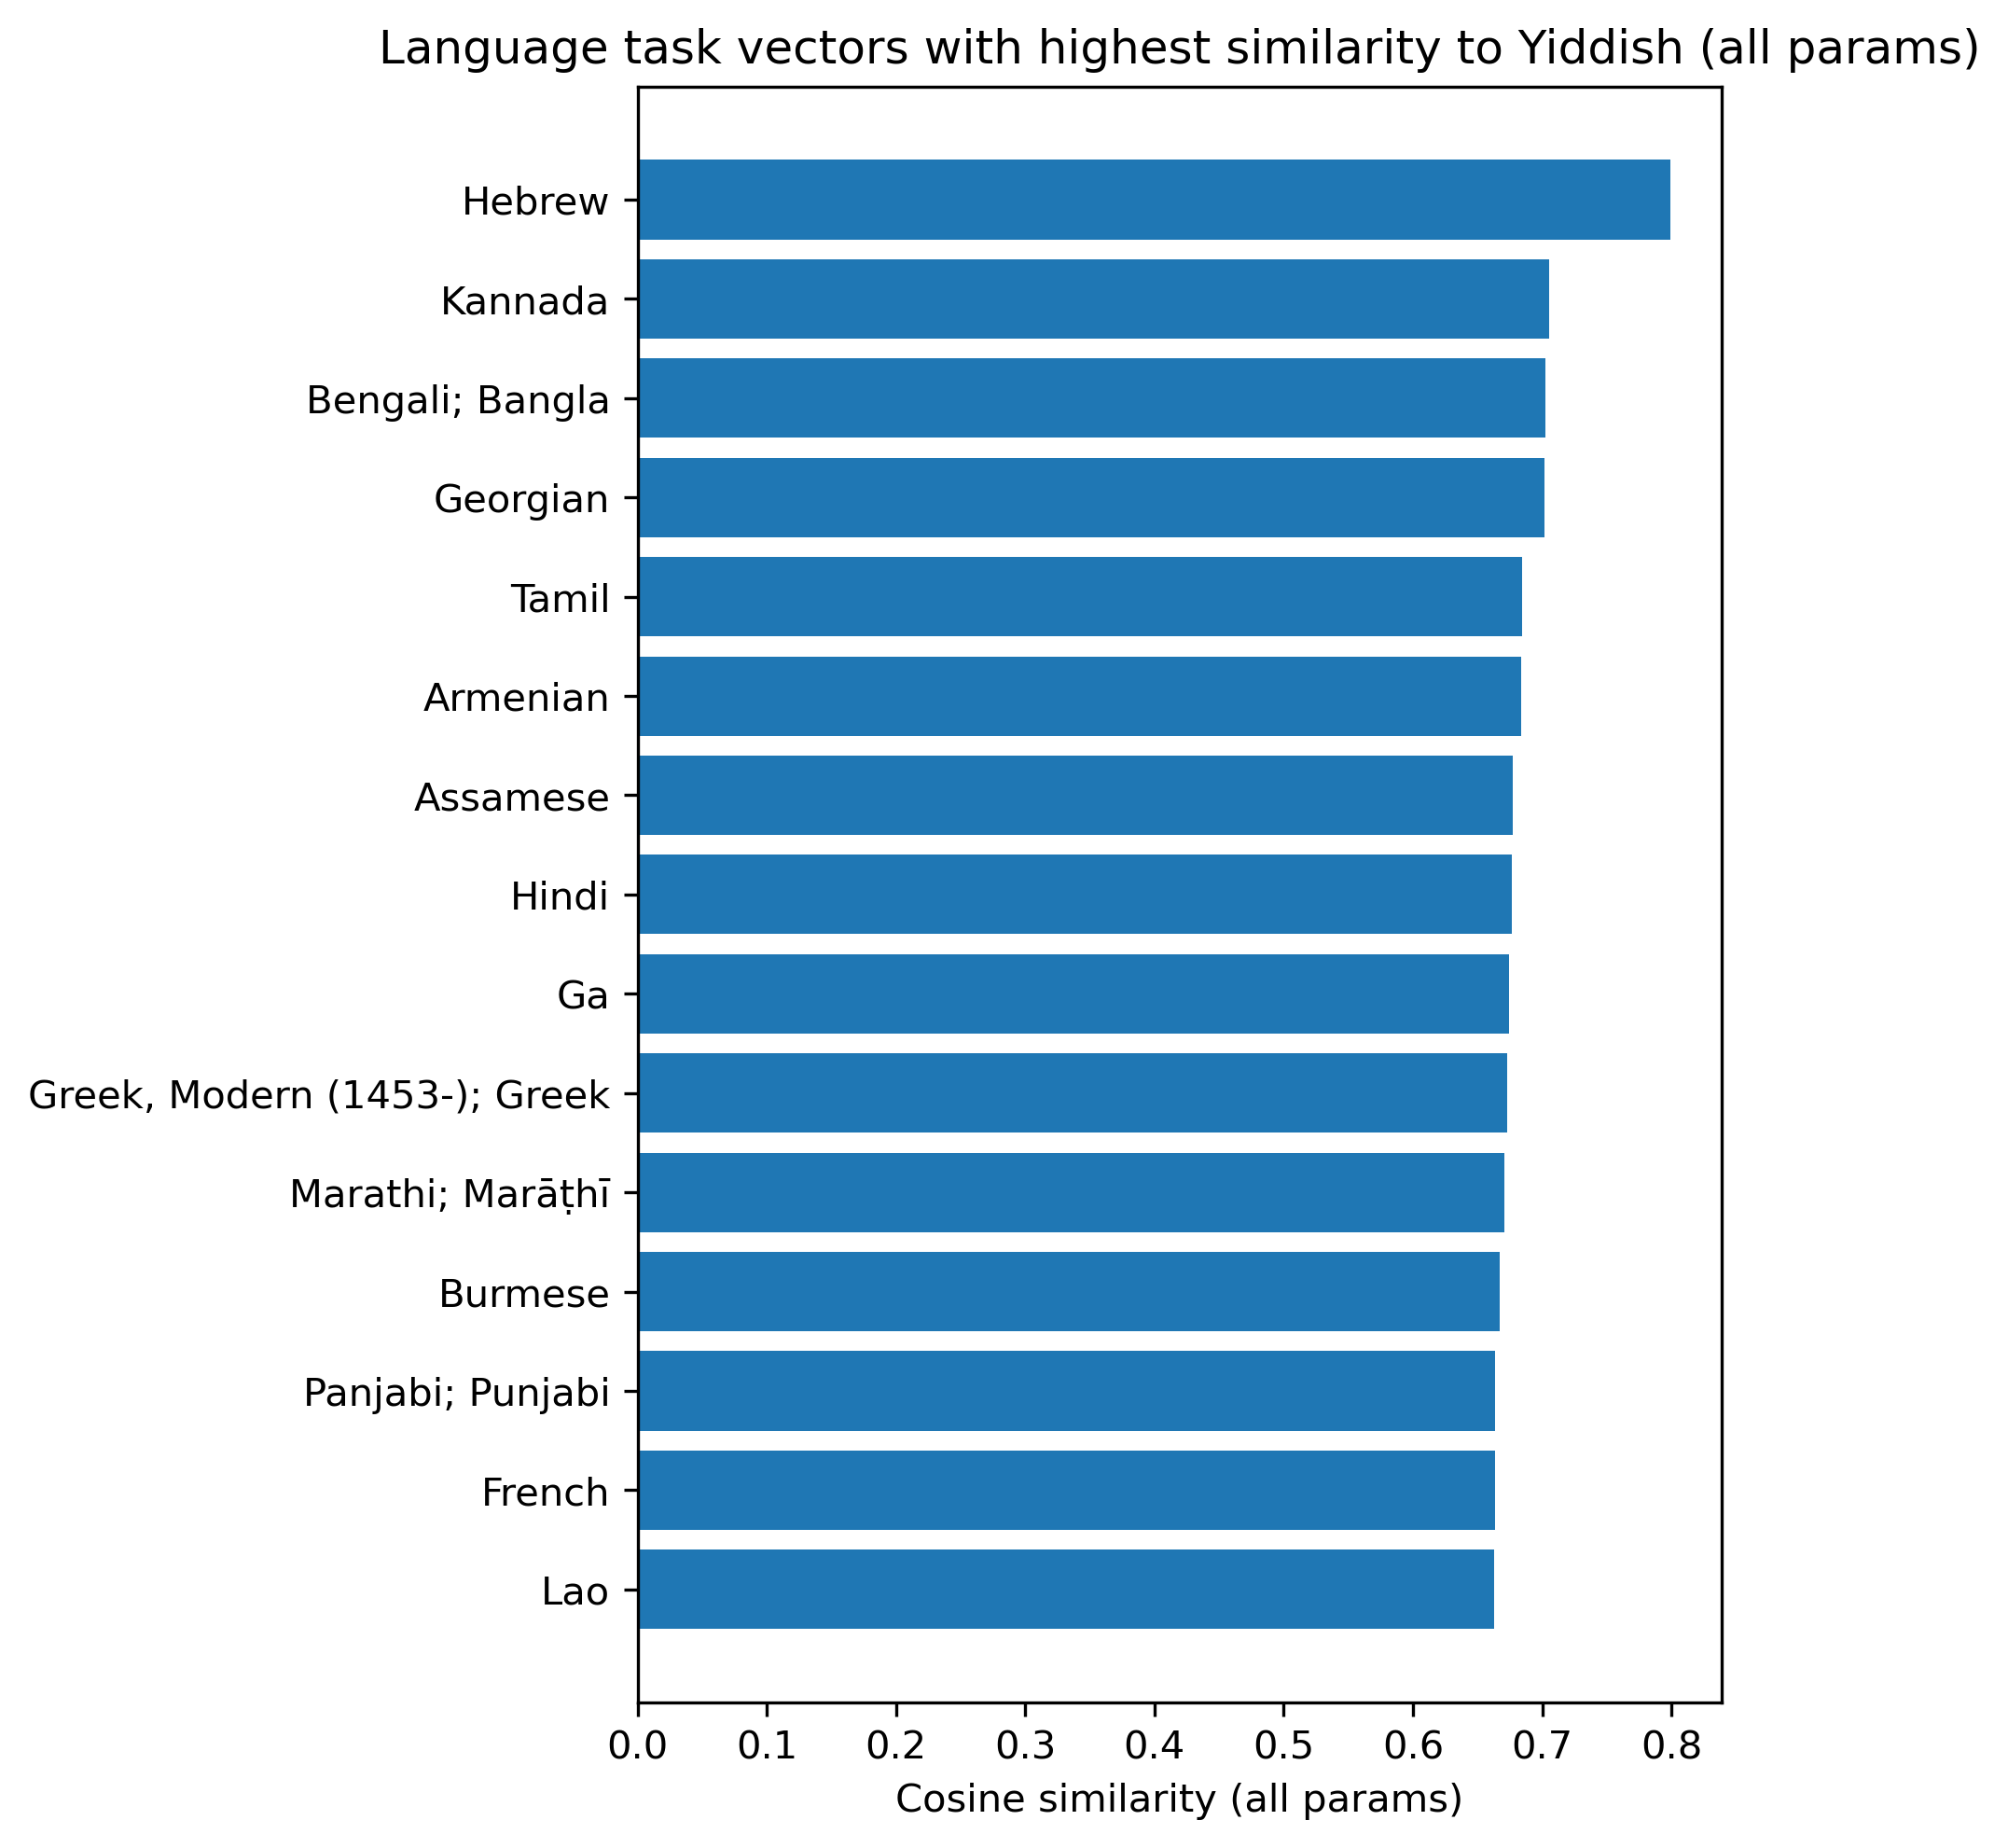

In [73]:
sorted_yi_cos_sim_pairs = sorted(mt5_small_lang_cos_sims["yi"].items(), key=lambda kv: kv[1]['all'], reverse=True)[1:16]
sorted_lang2s = [iso639.to_name(t[0]) for t in sorted_yi_cos_sim_pairs]
sorted_cos_sims = [t[1]["all"] for t in sorted_yi_cos_sim_pairs]
x = list(range(len(sorted_lang2s)))
plt.barh(x, sorted_cos_sims)
plt.yticks(ticks=x, labels=sorted_lang2s)
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(5, 7.5)
plt.xlabel("Cosine similarity (all params)")
plt.title("Language task vectors with highest similarity to Yiddish (all params)")

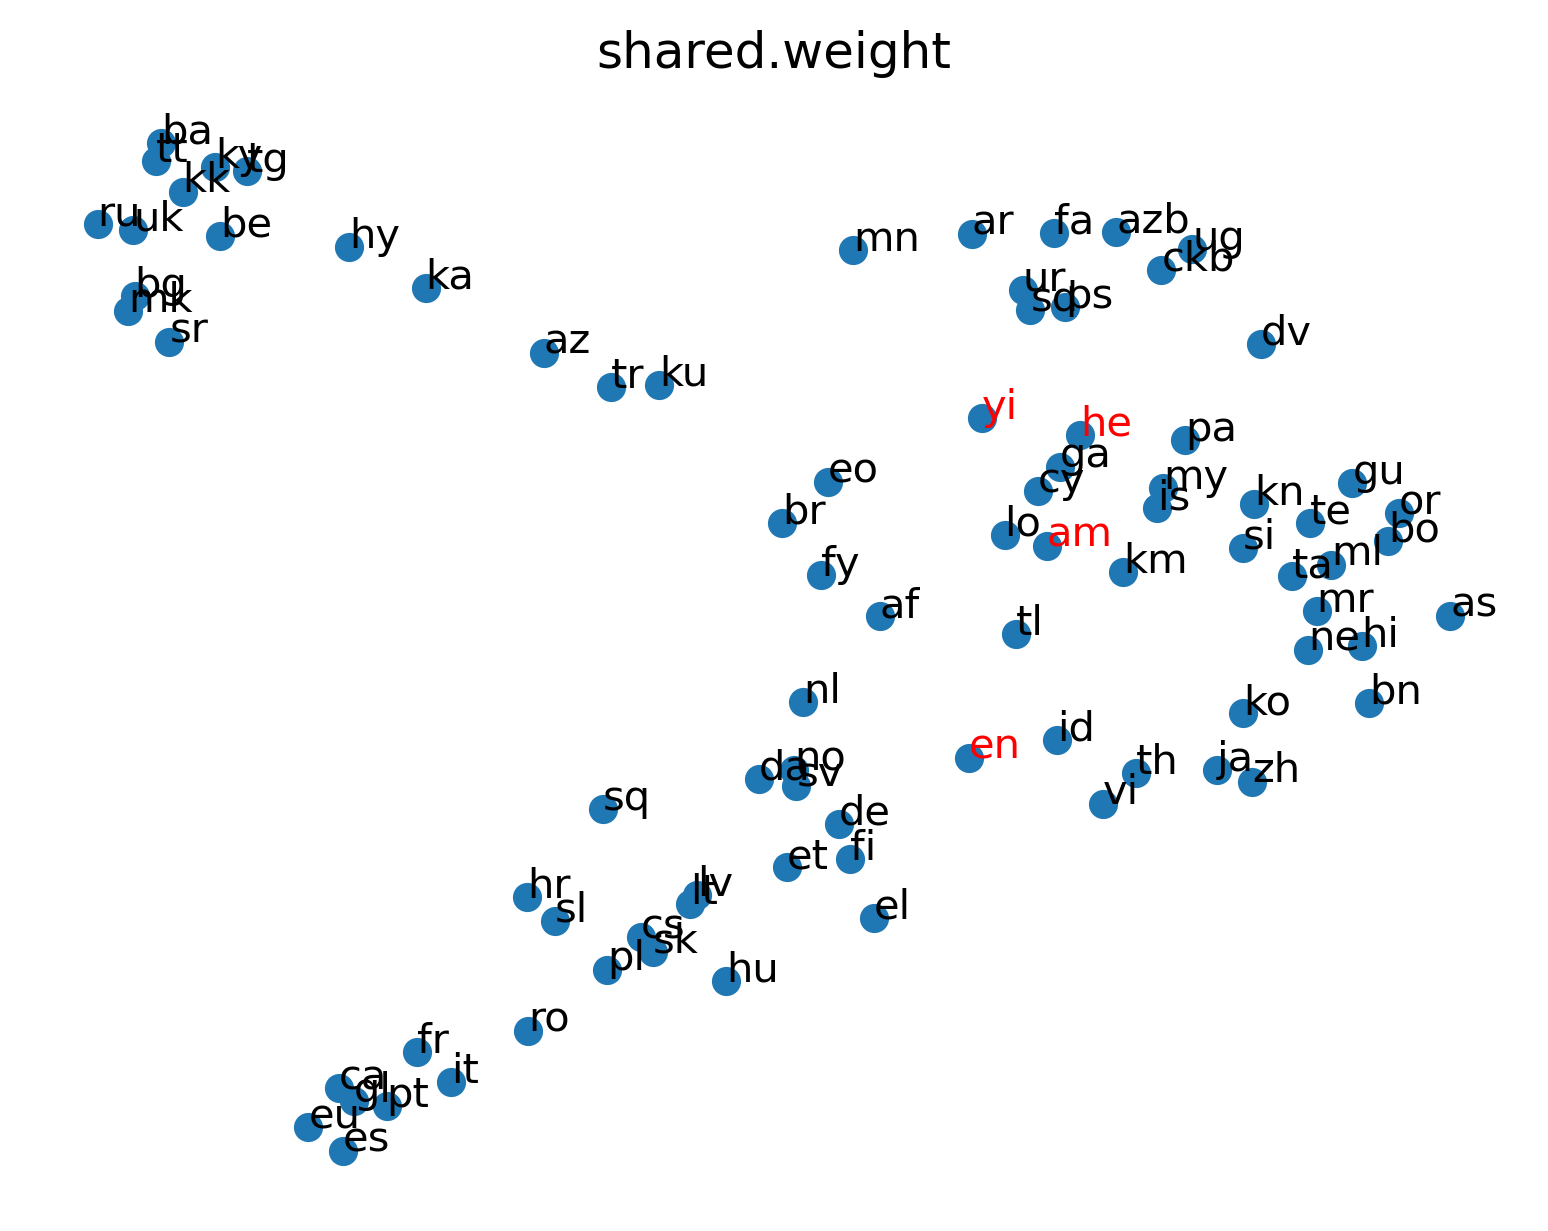

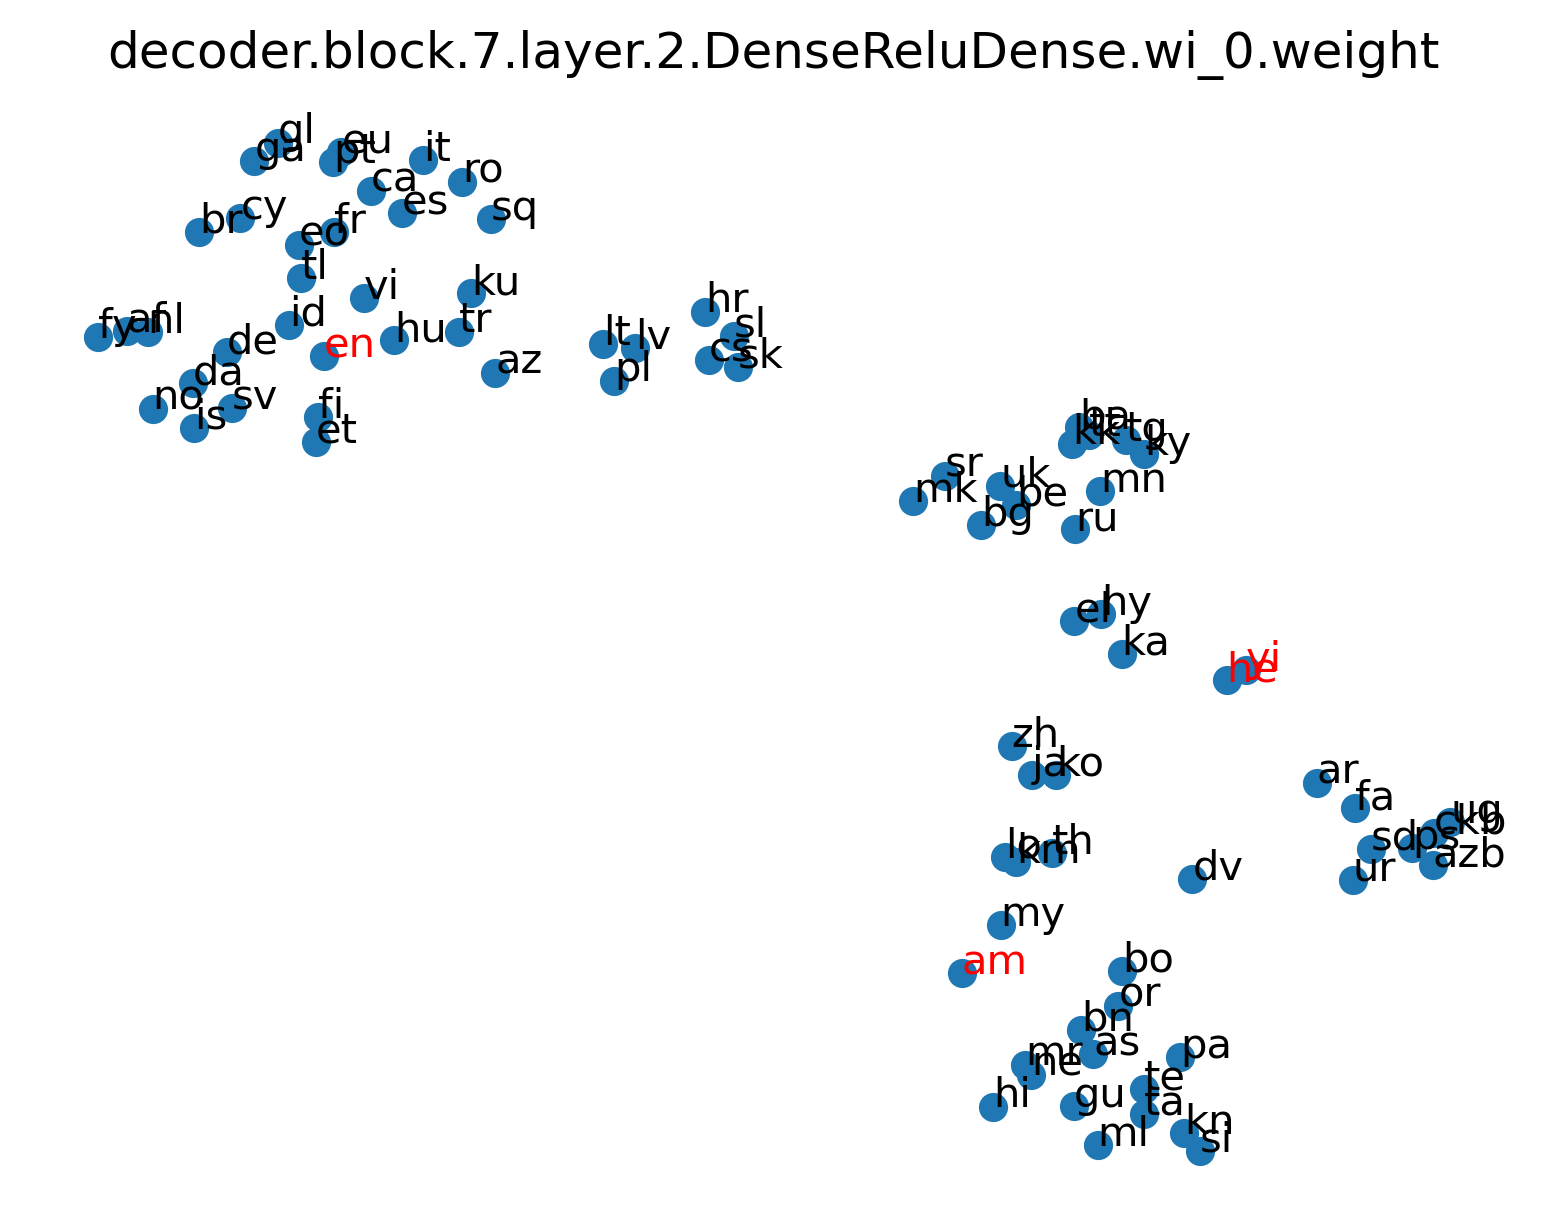

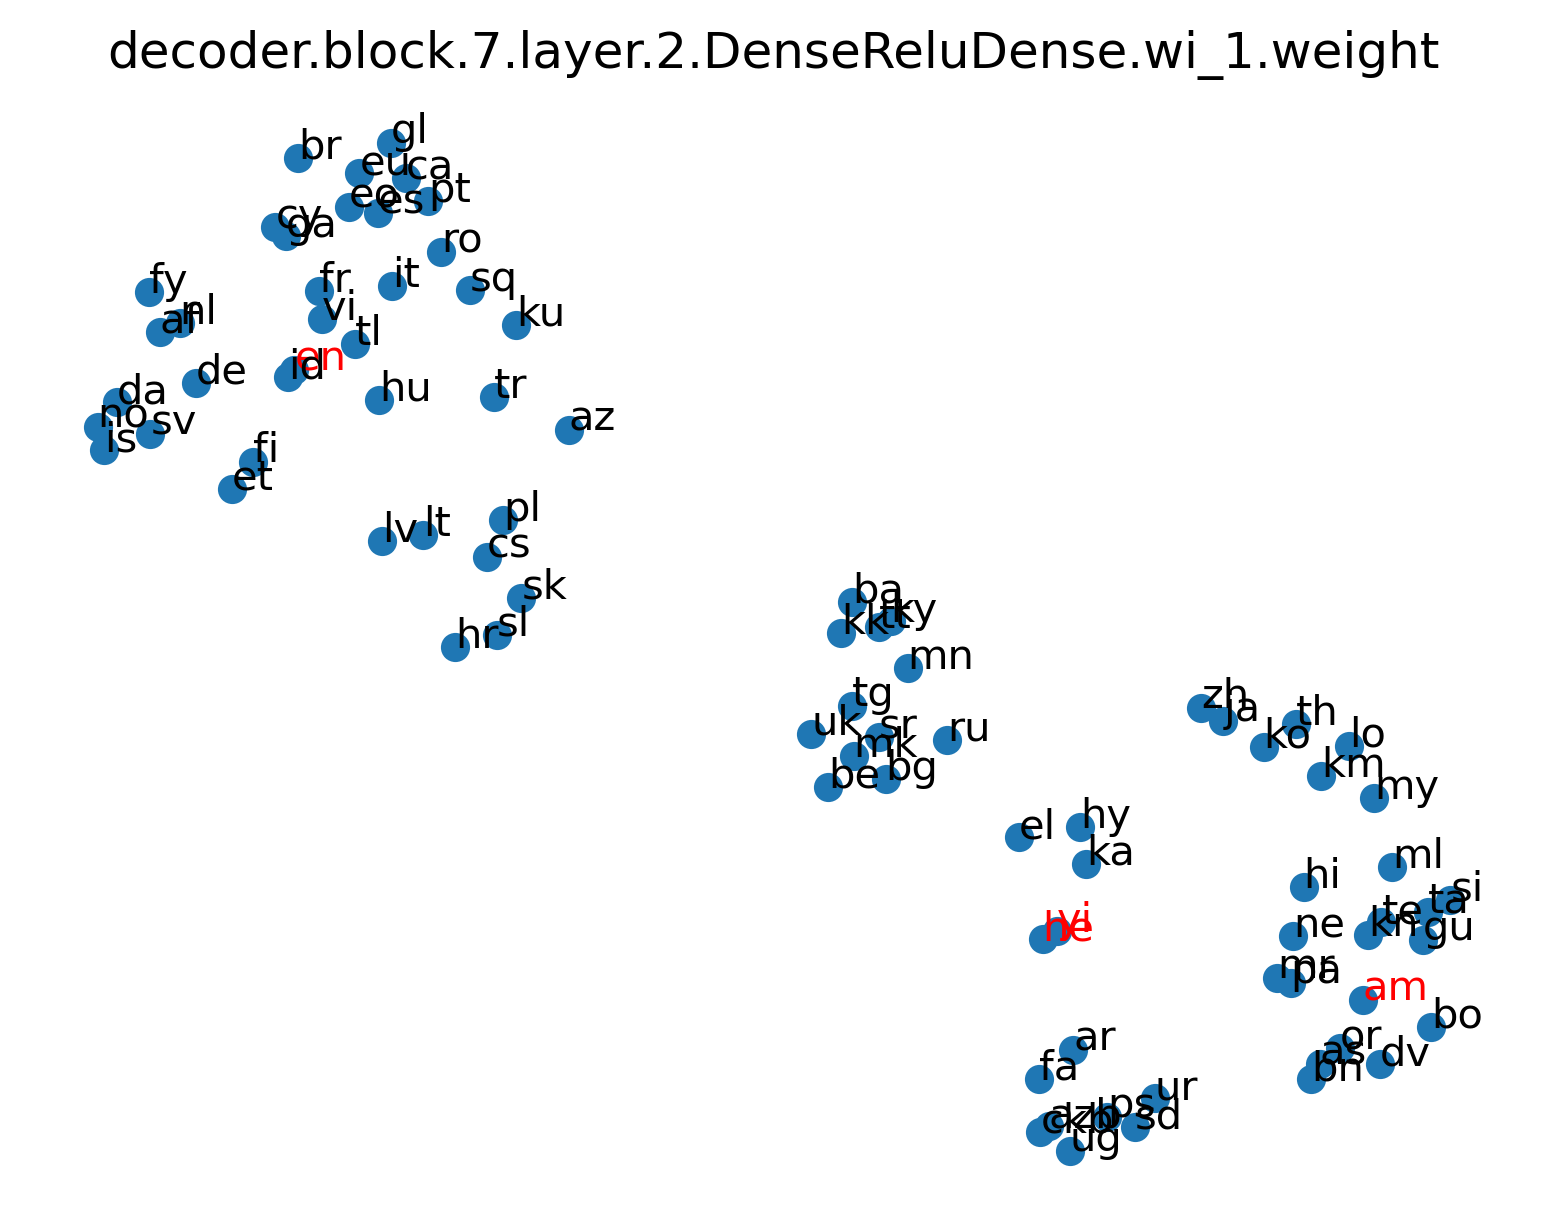

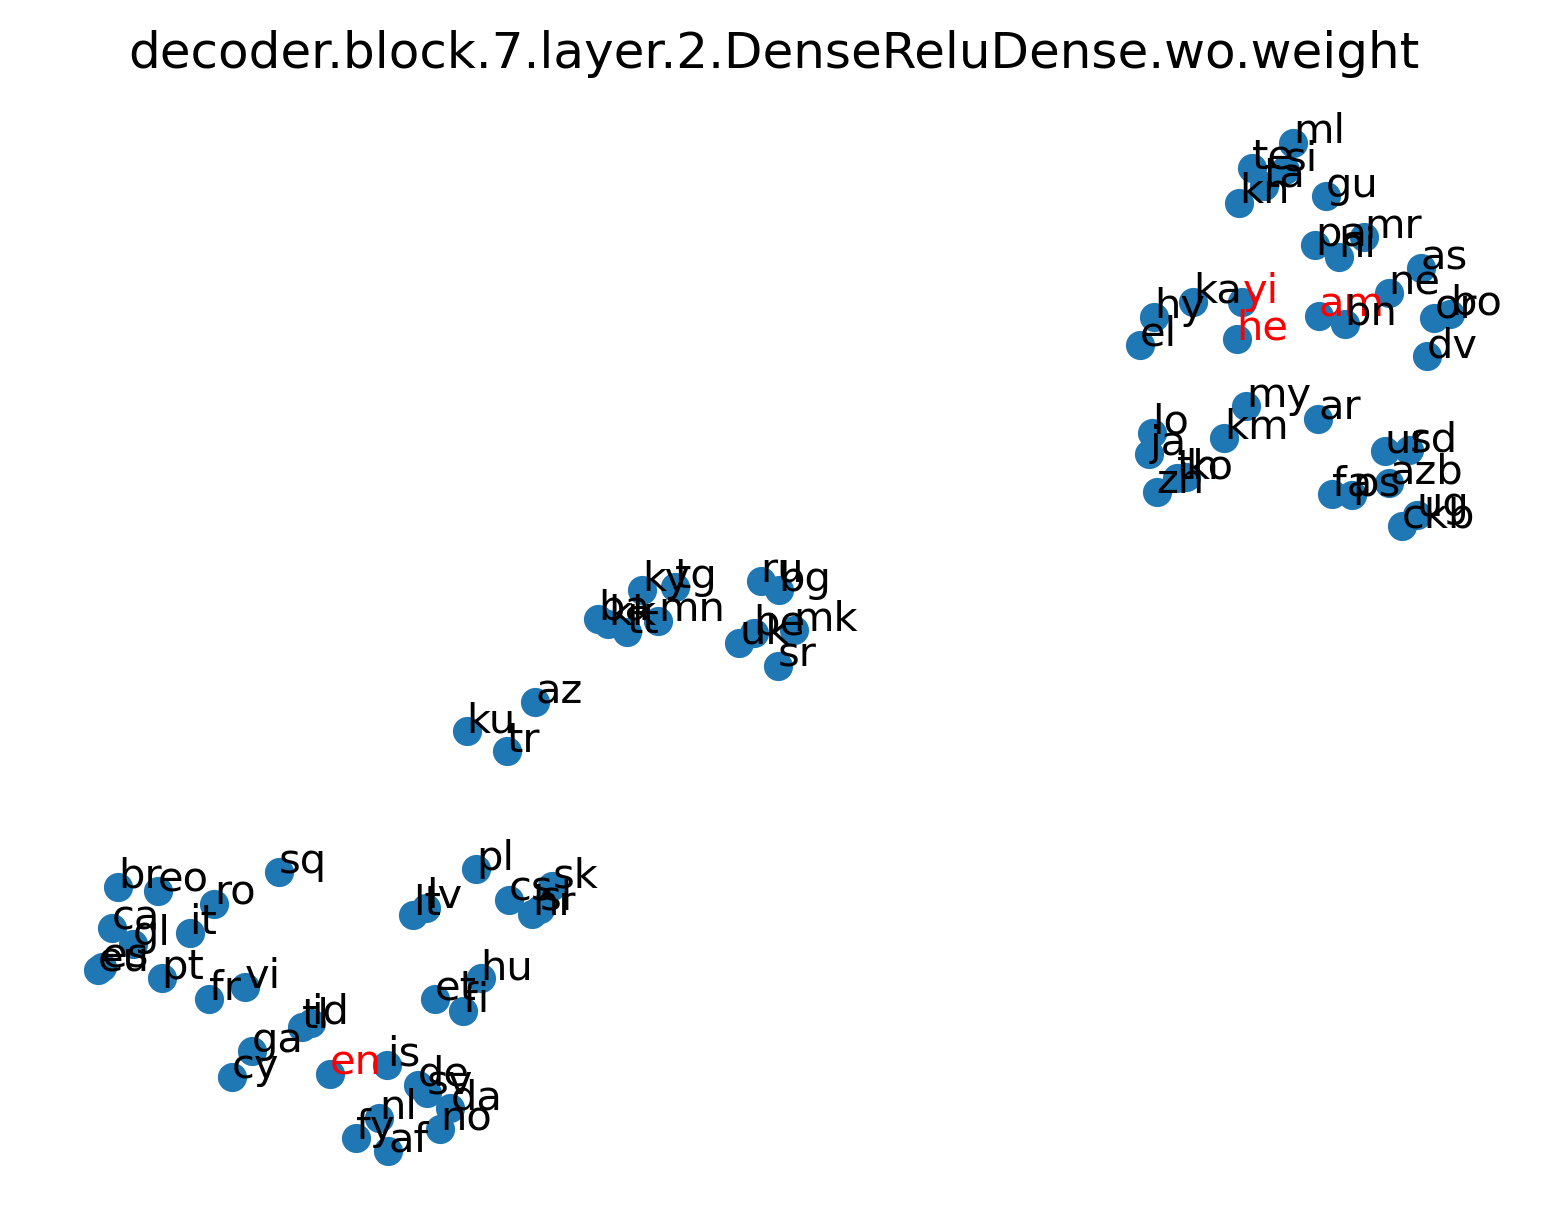

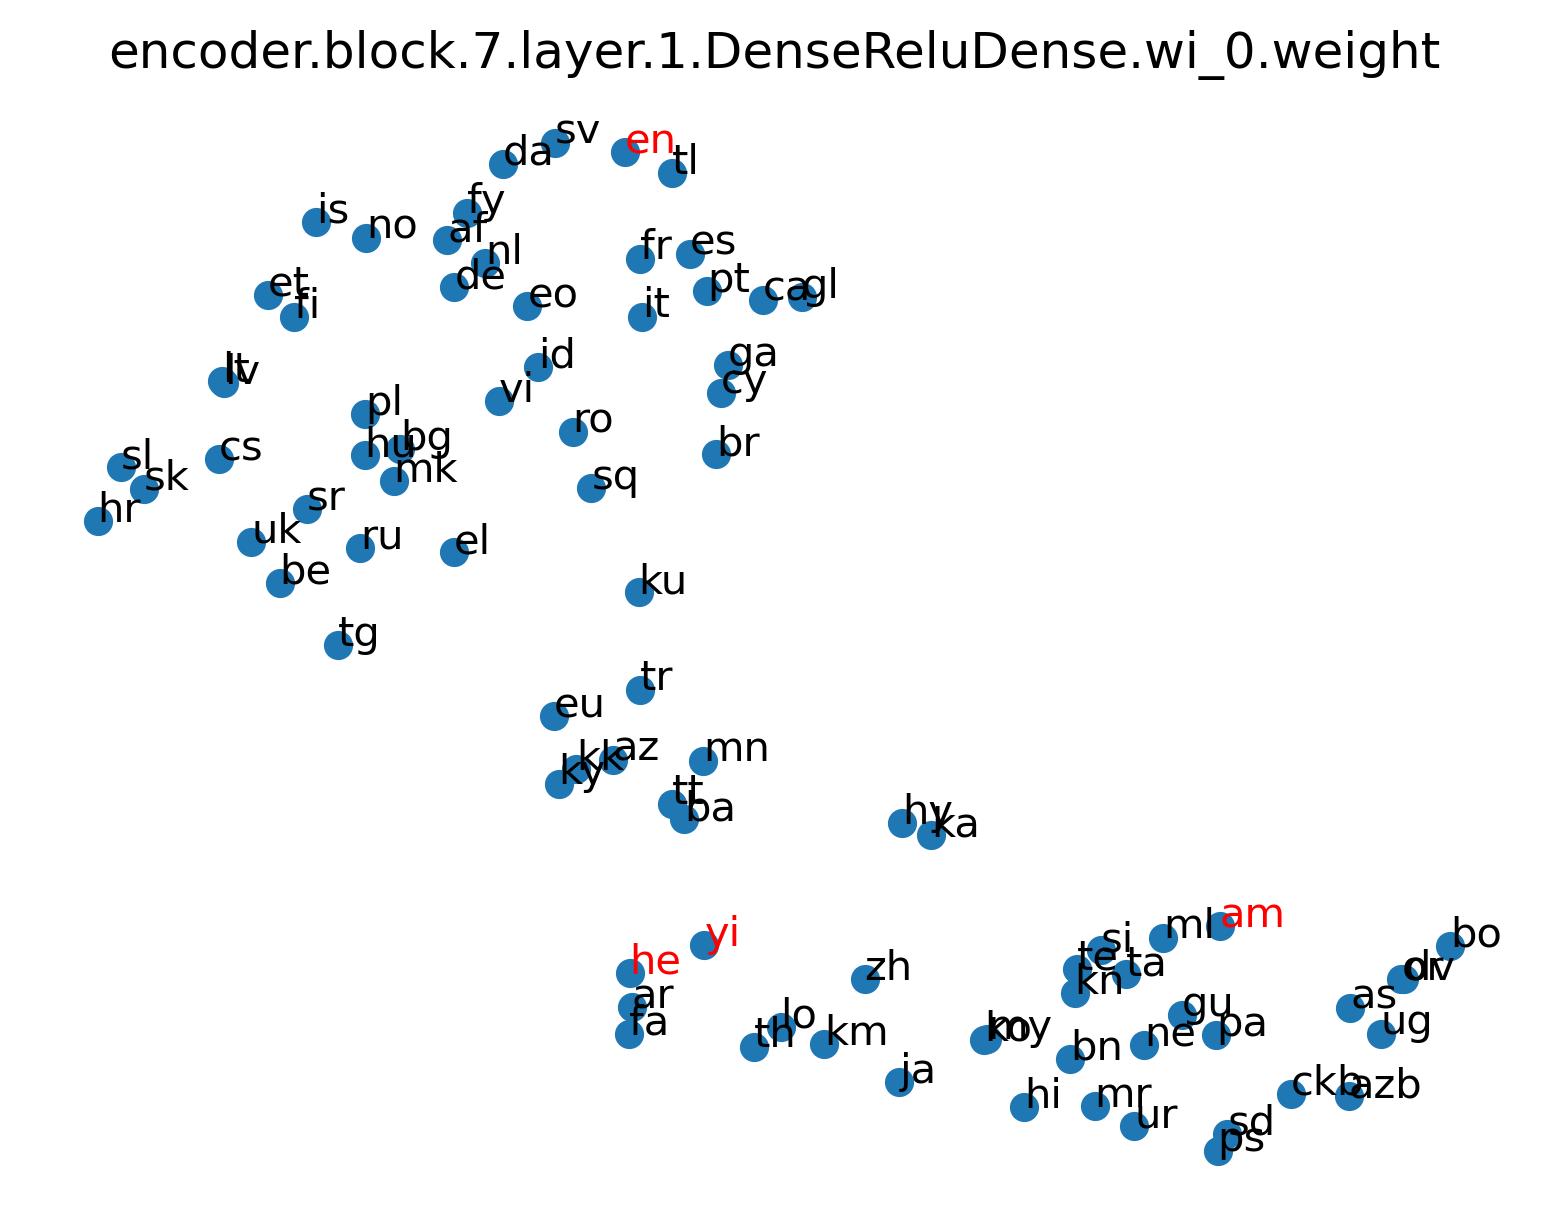

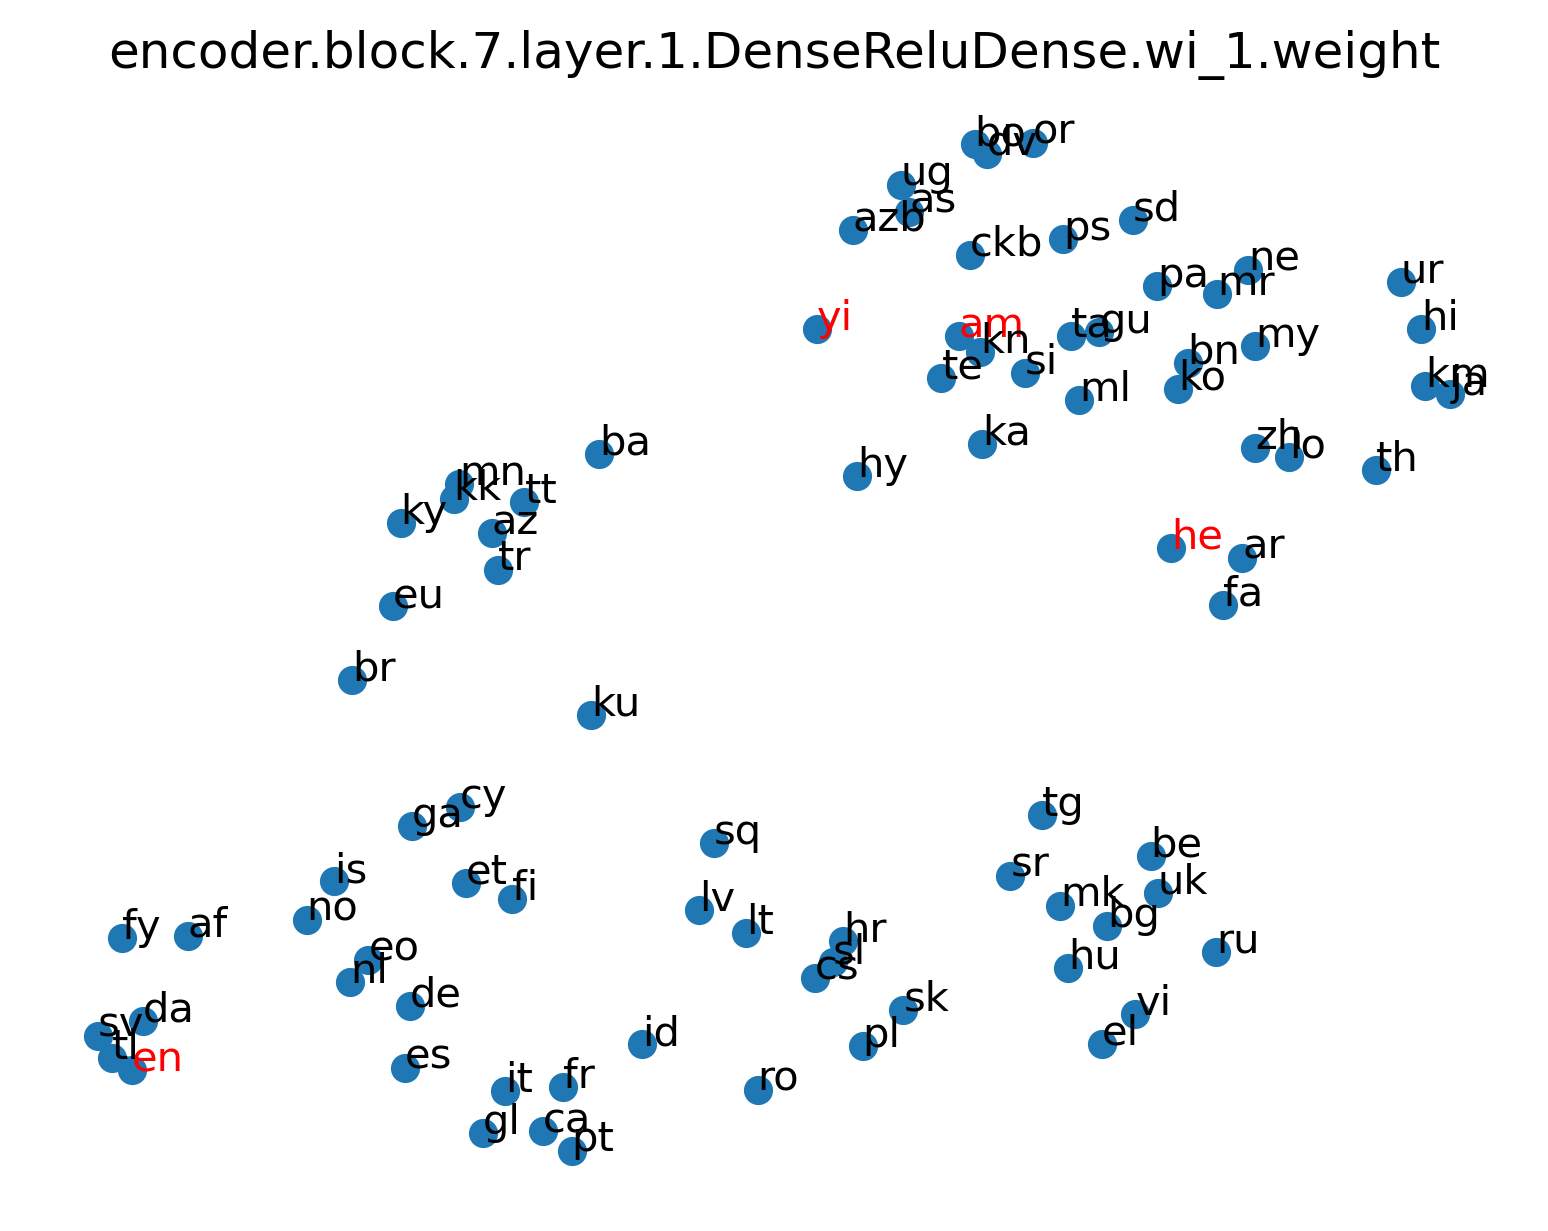

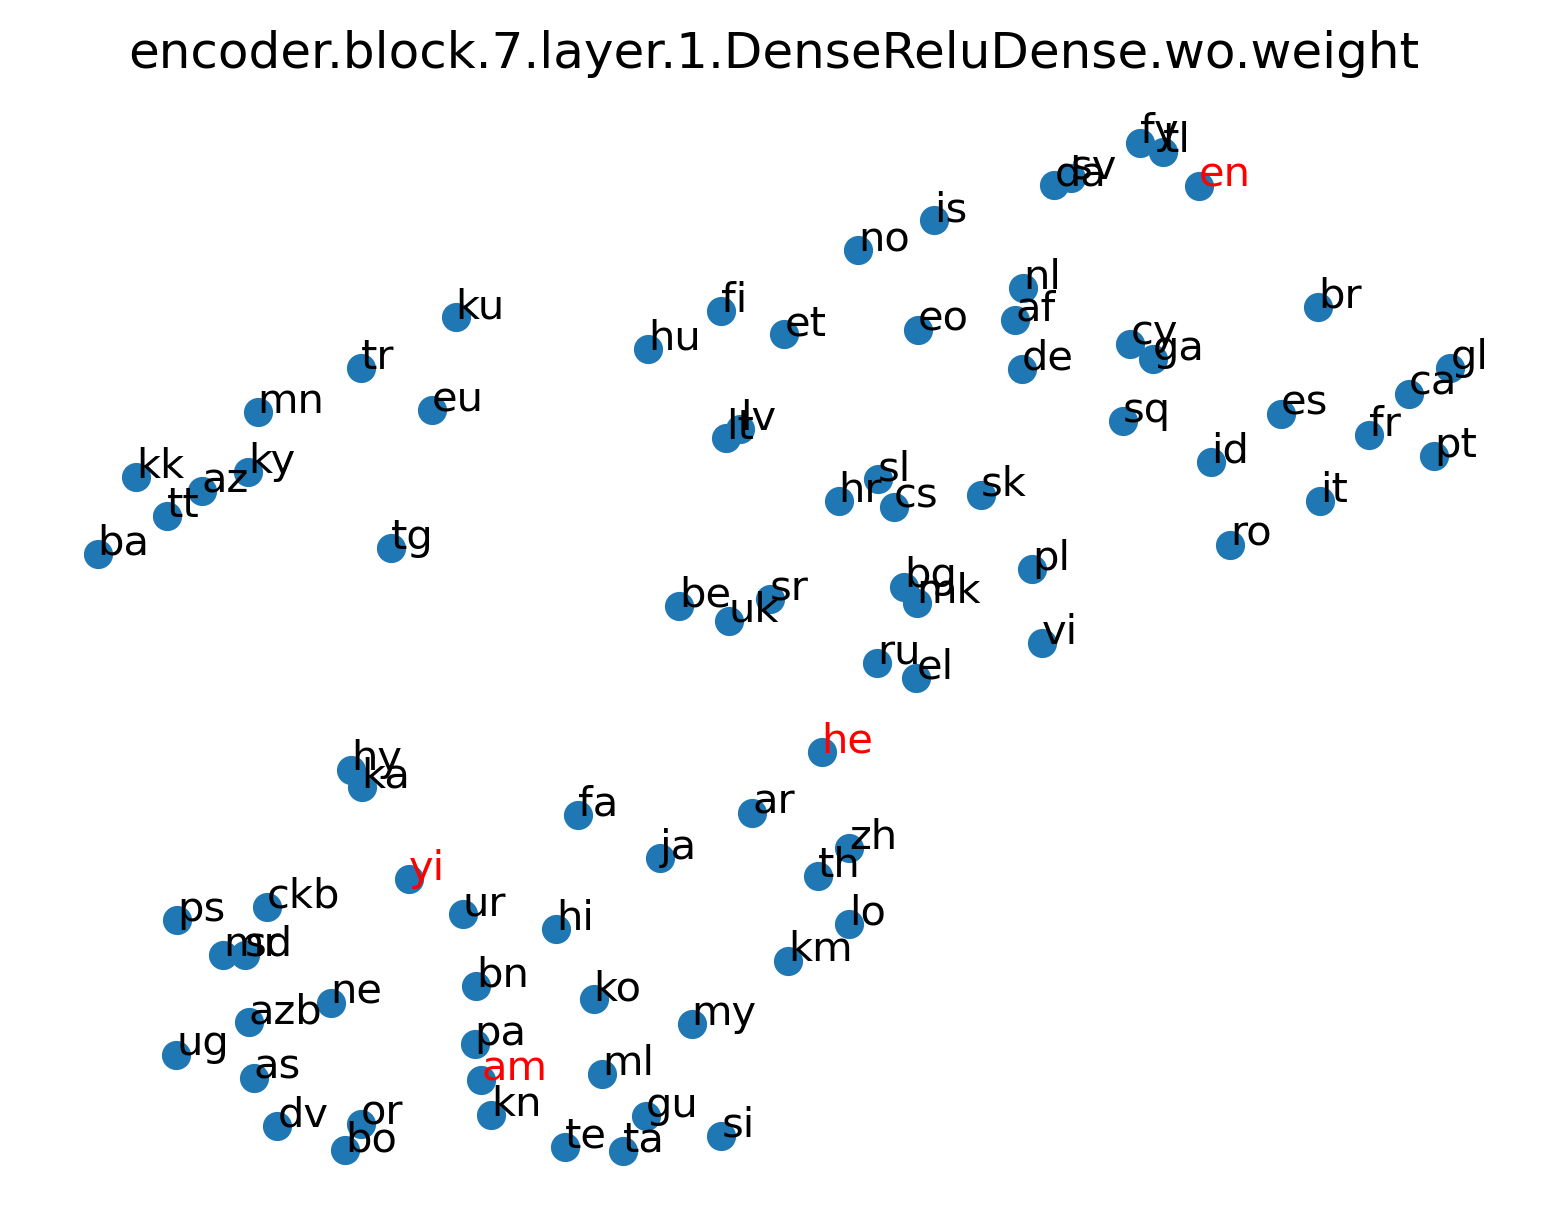

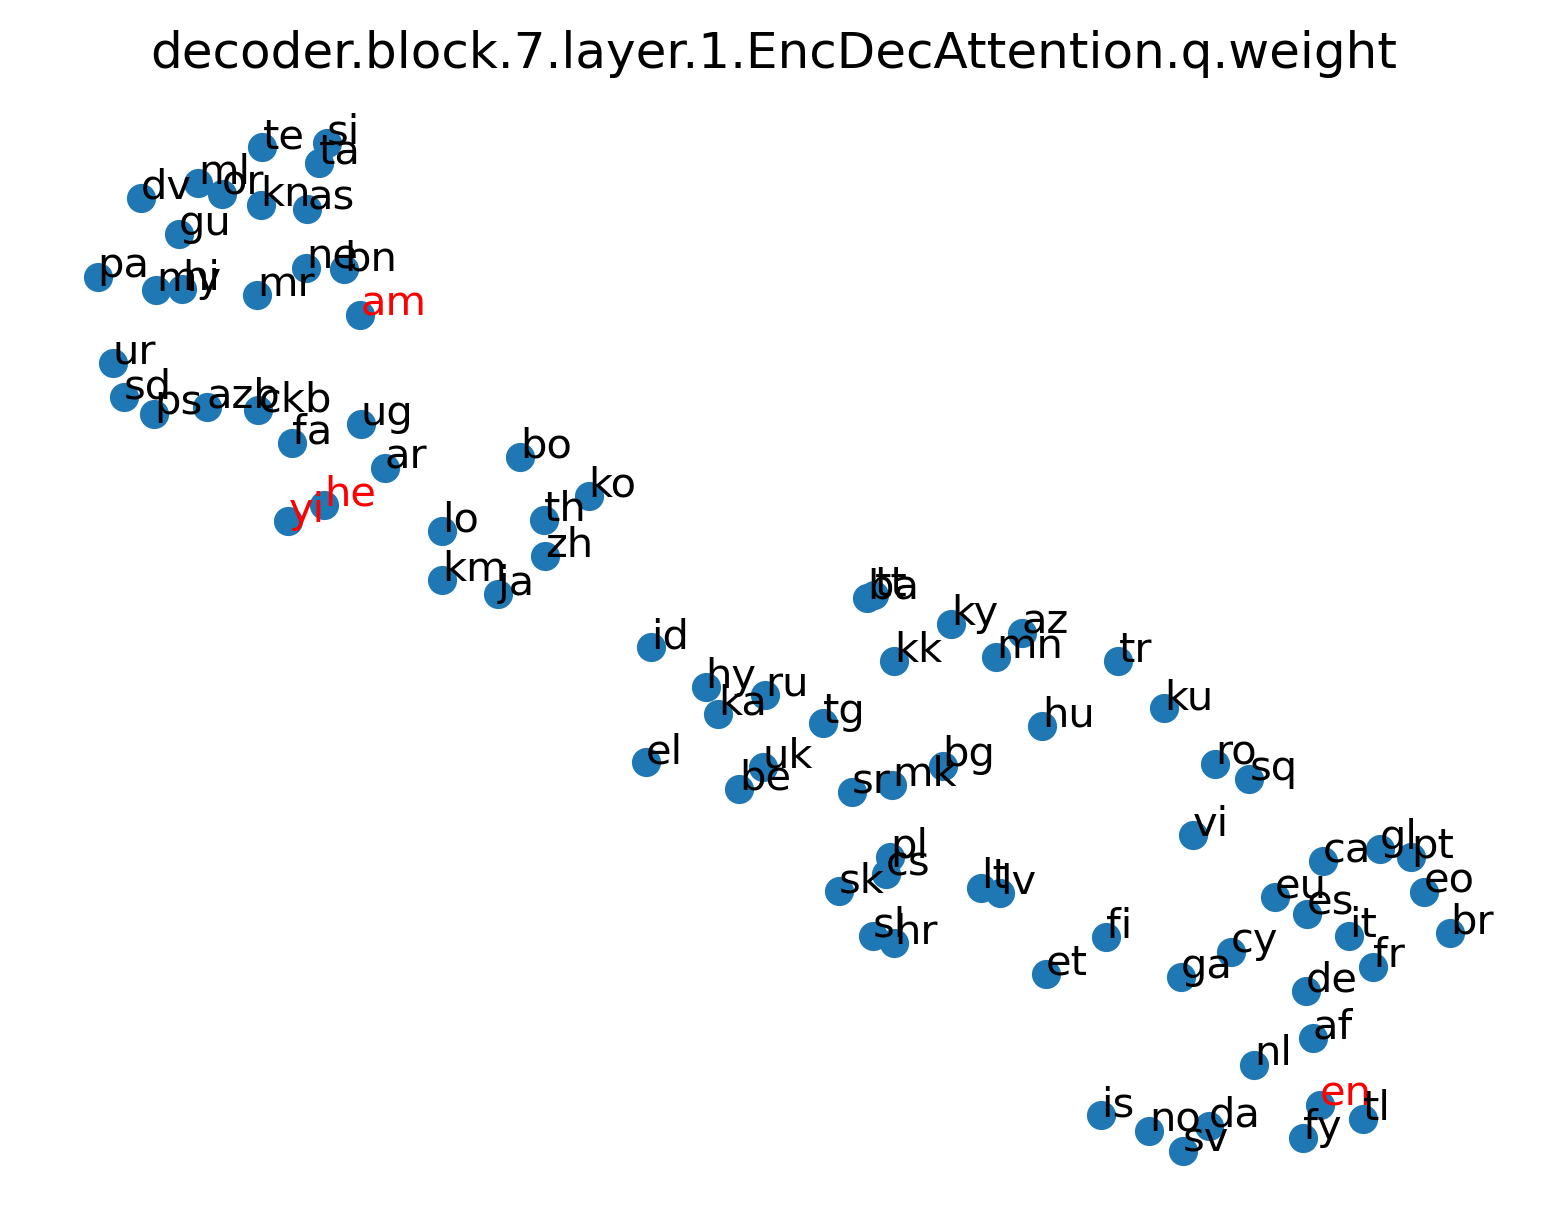

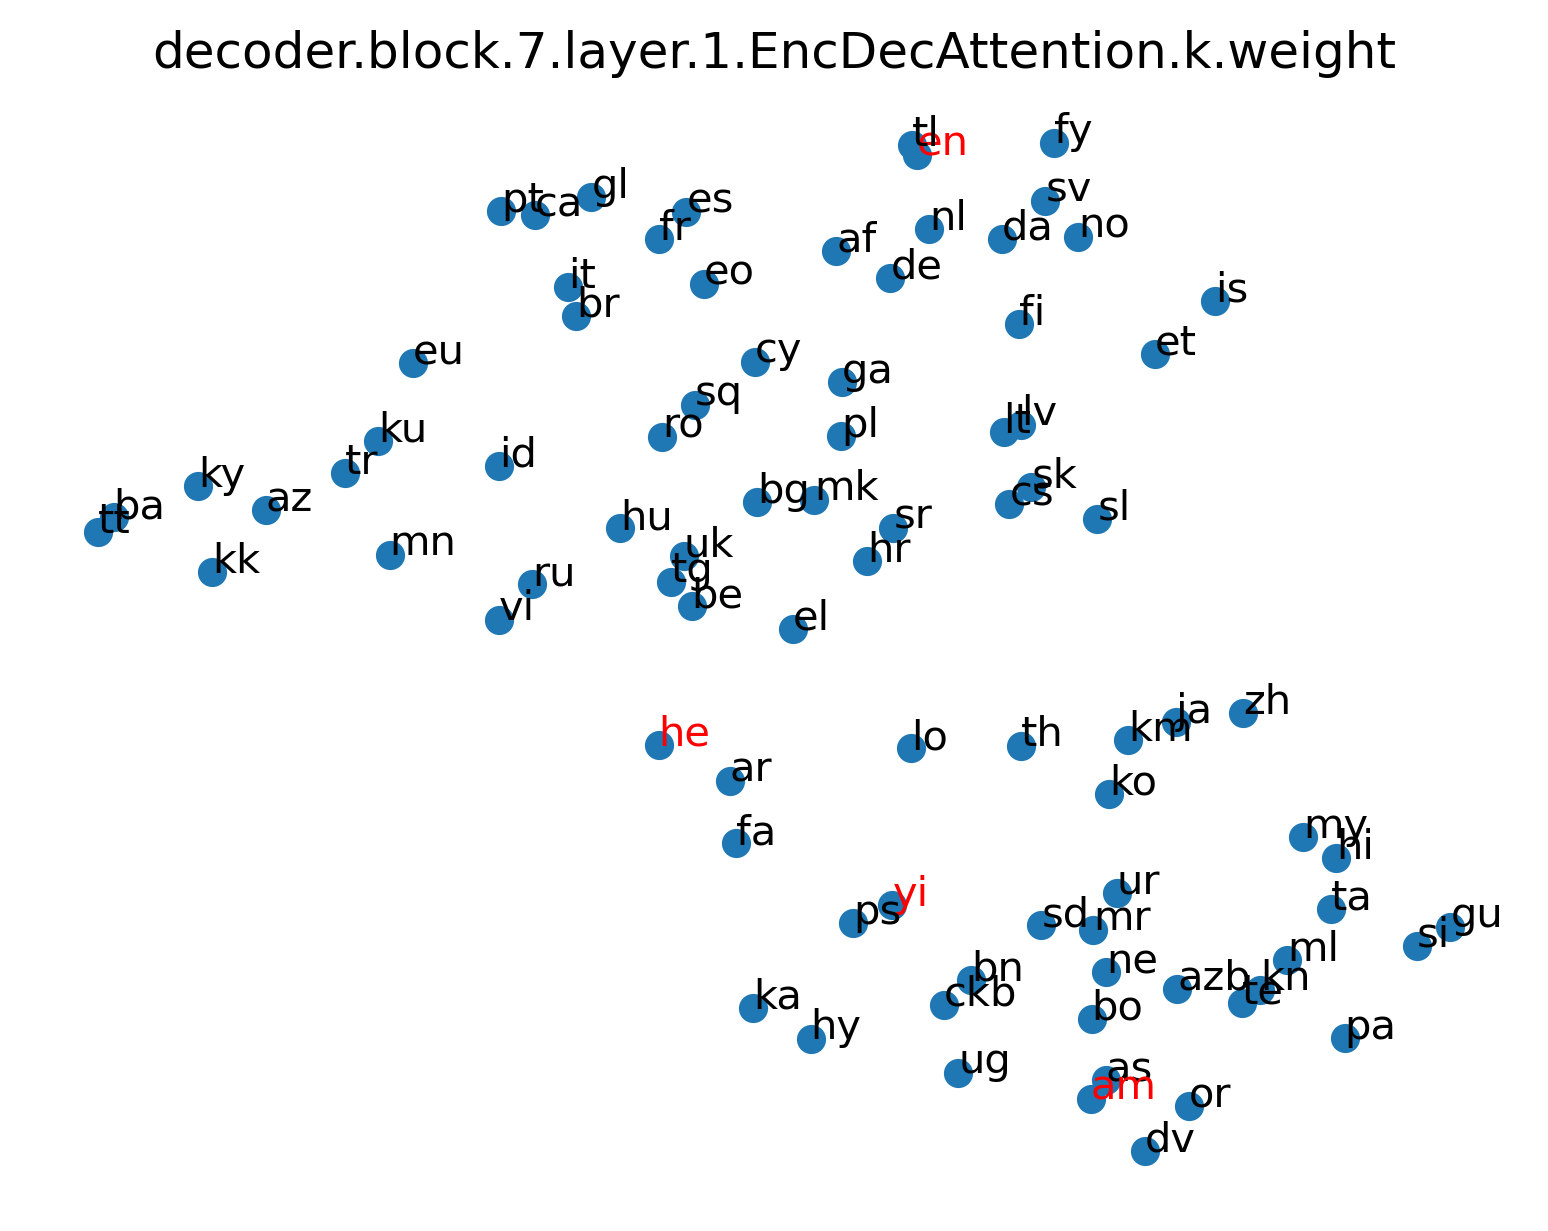

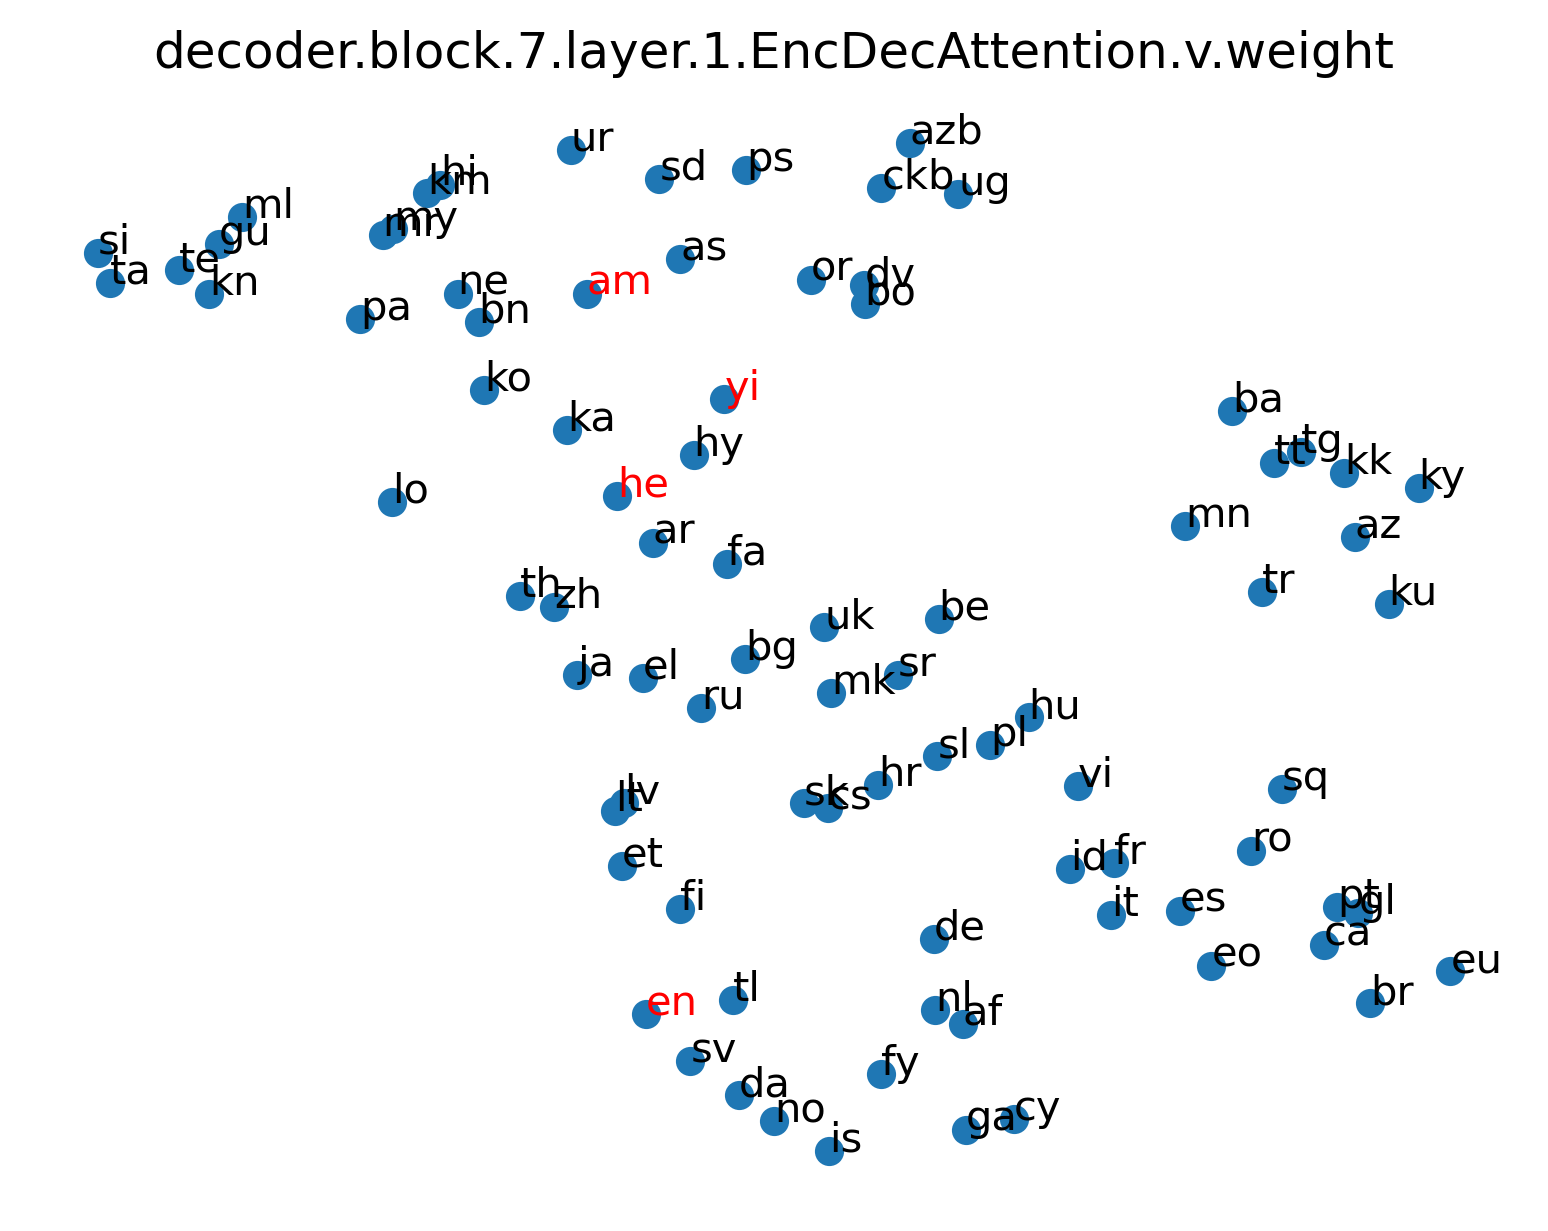

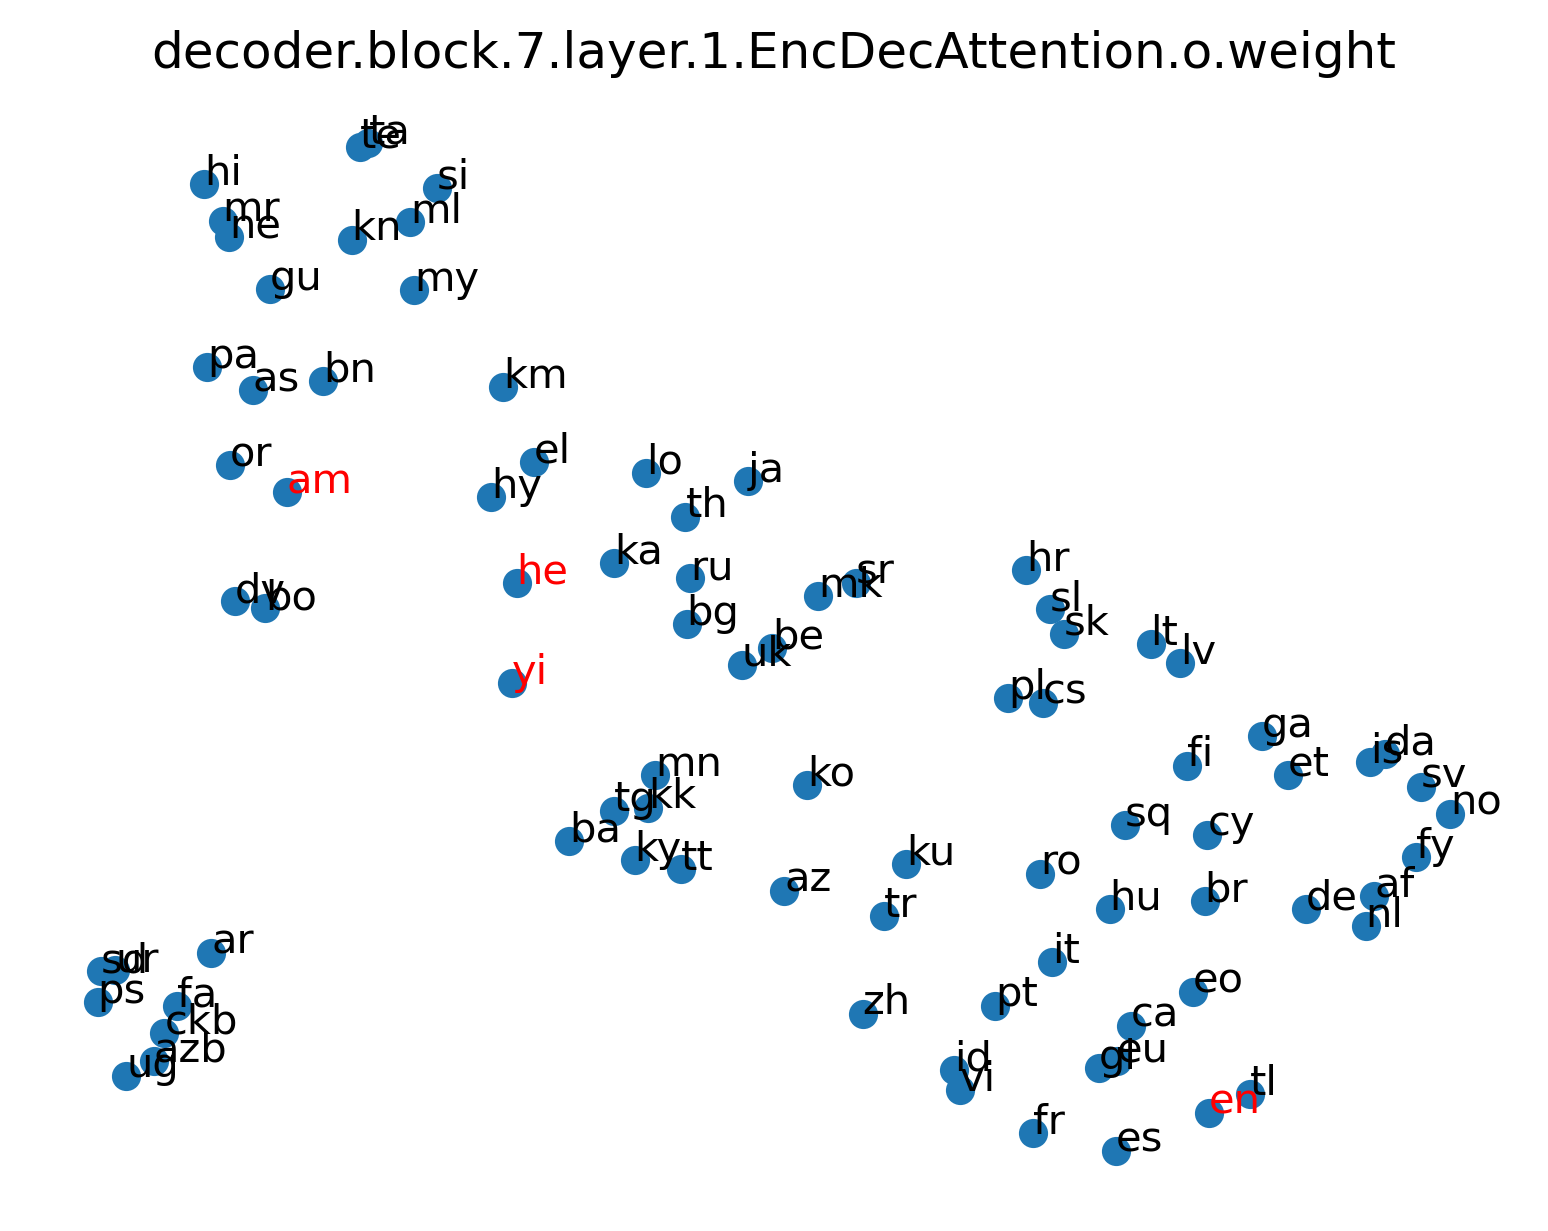

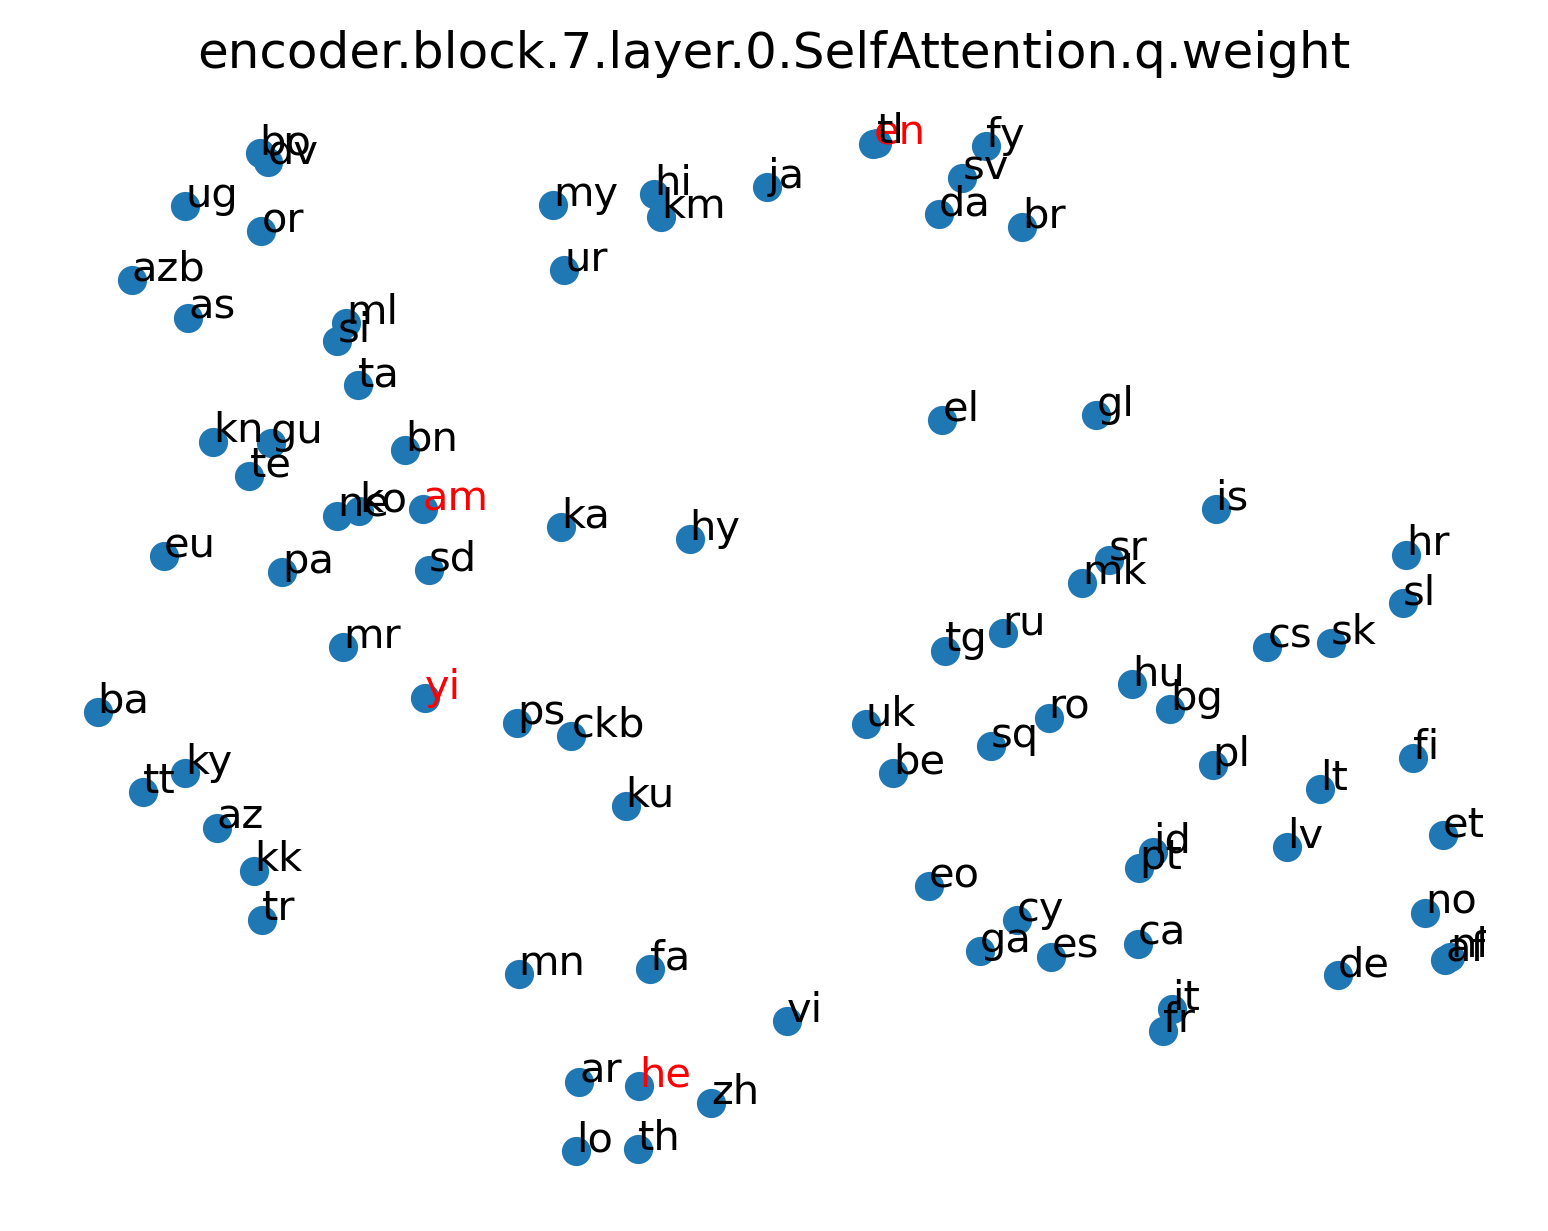

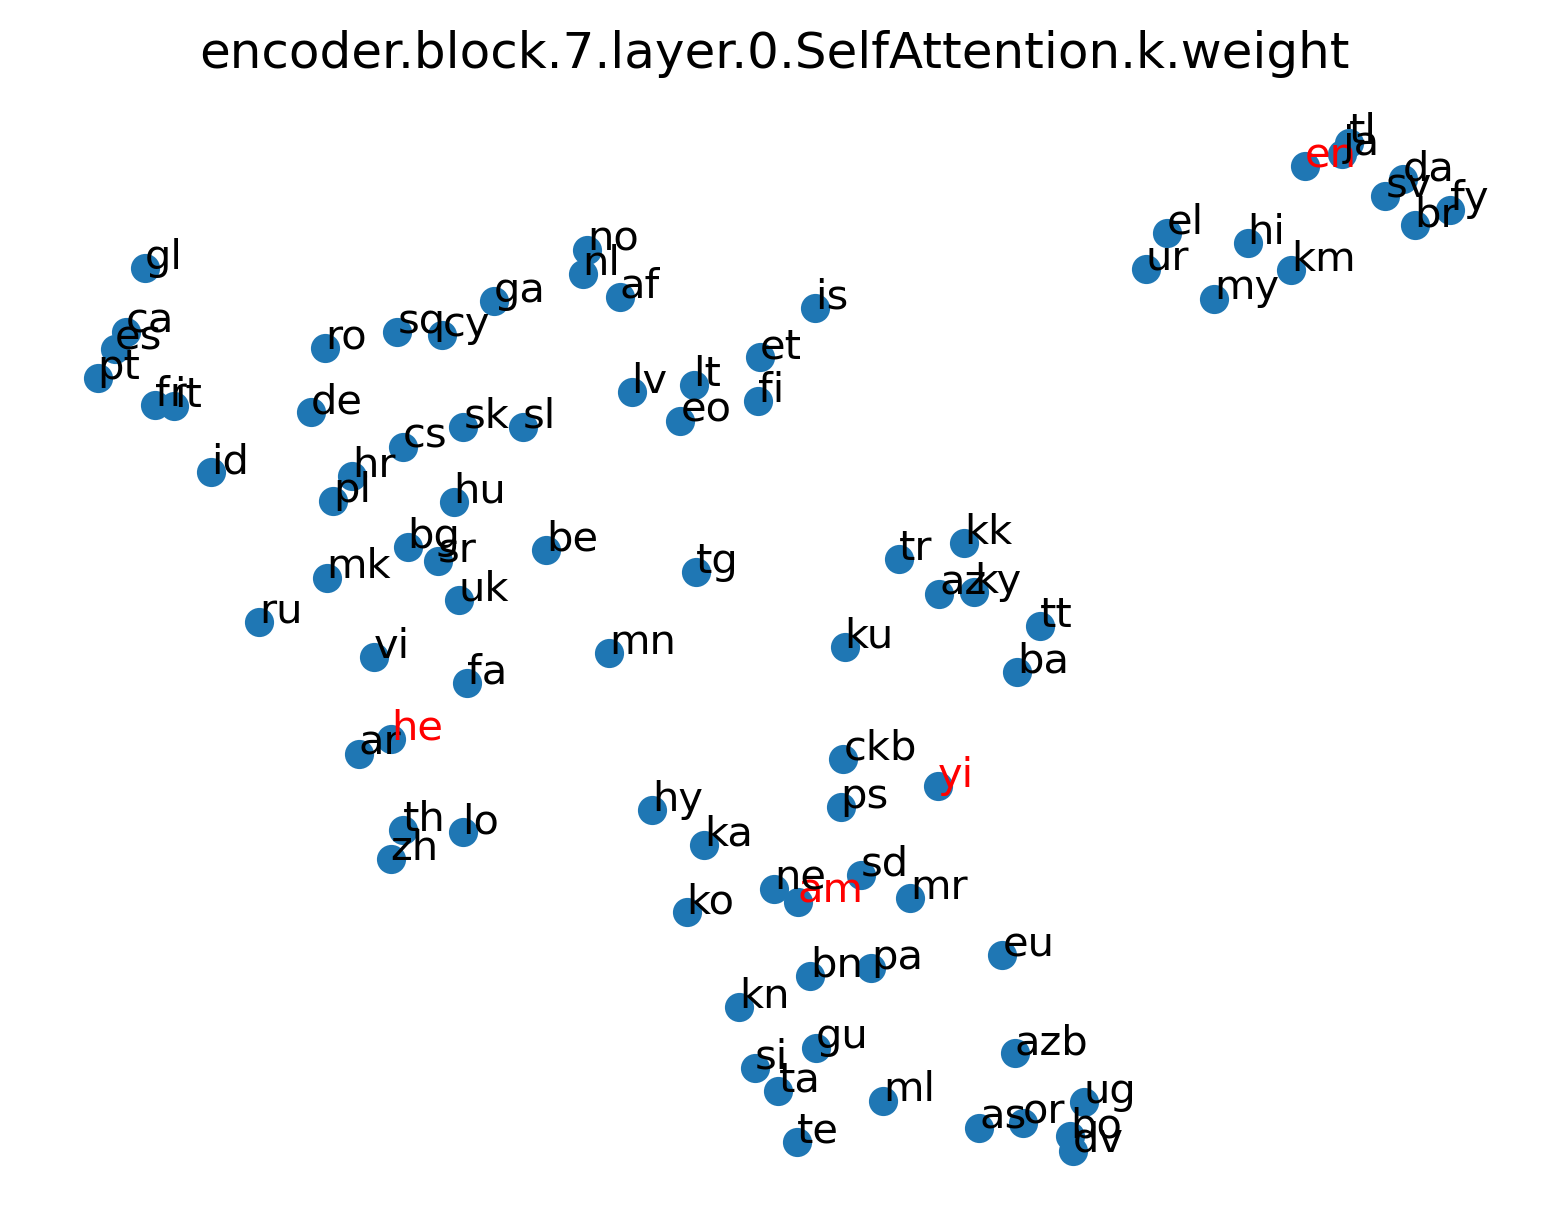

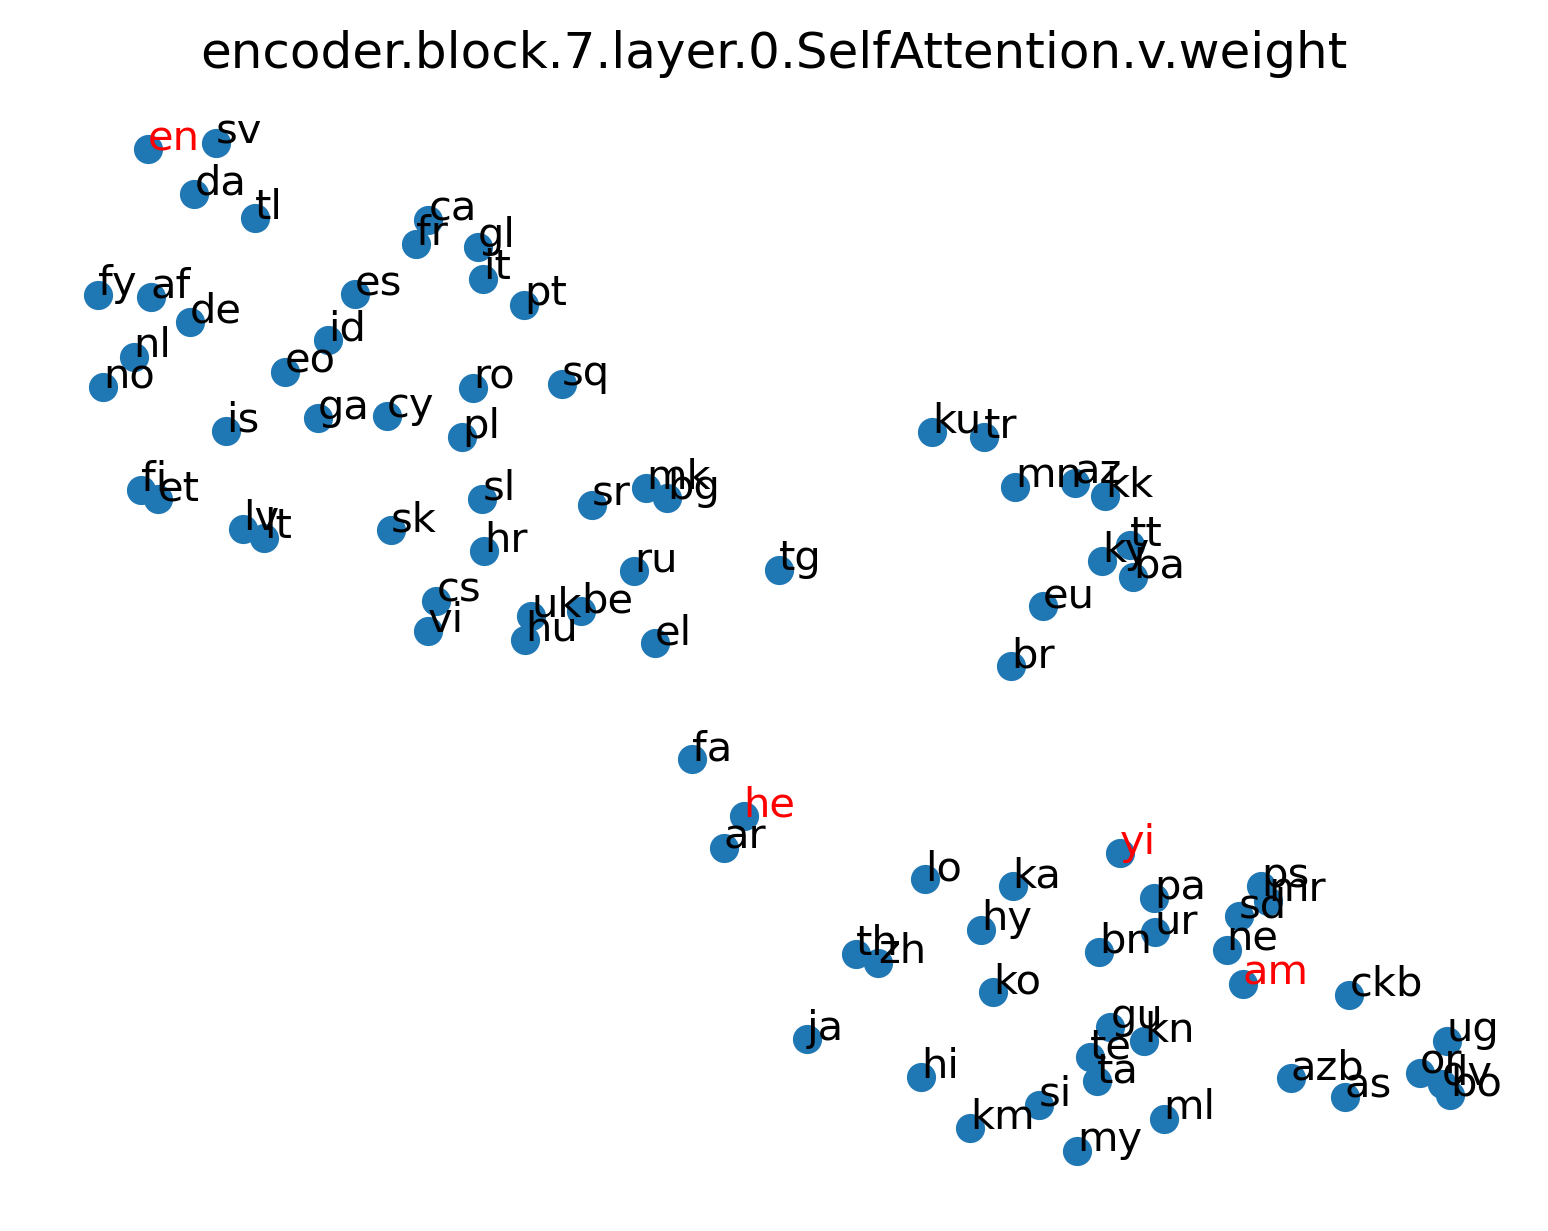

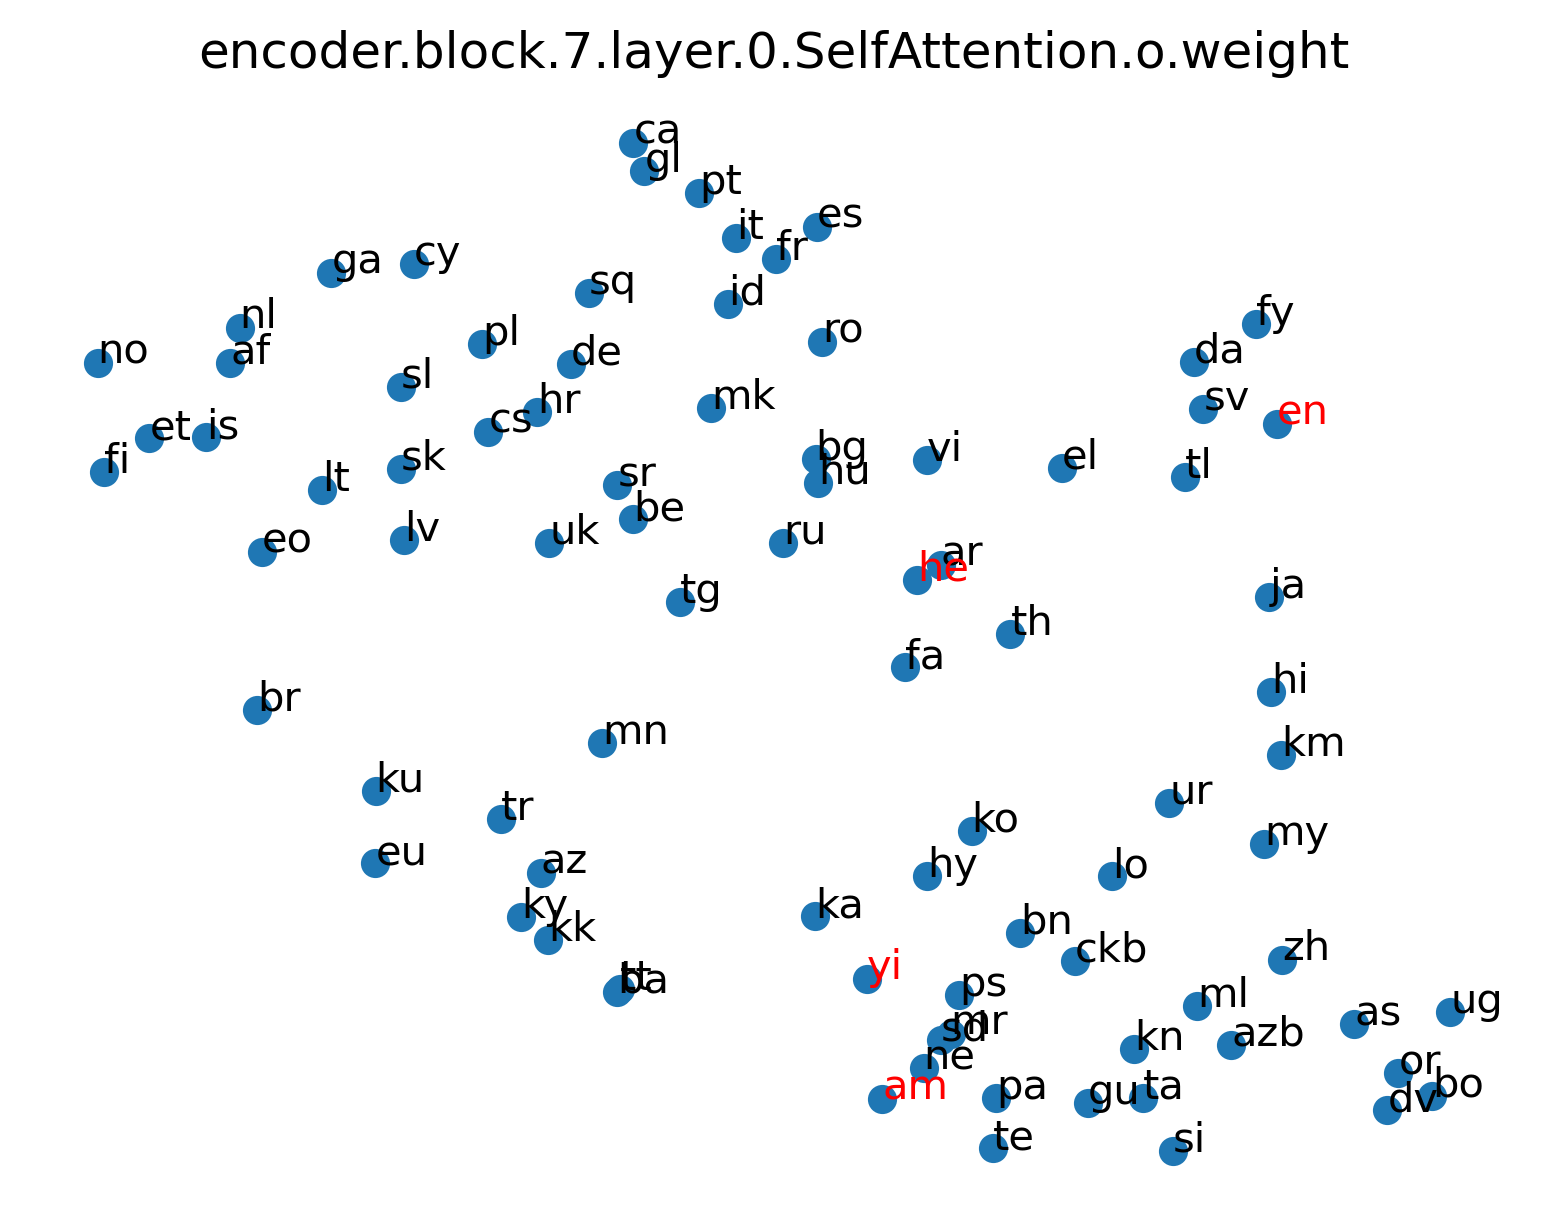

In [74]:
mt5_small_lang_projs = np.load("./projections/mt5-small_lang_model_projections_nneighbors=10.npy", allow_pickle=True).item()

pt_langs = mt5_small_lang_projs["model_langs"]
for param, proj_pts in mt5_small_lang_projs.items():
    if param != "model_langs":
        plt.scatter(proj_pts[:, 0], proj_pts[:, 1])#, c=list(range(len(proj_pts))), cmap="hsv")
        for i, lang in enumerate(pt_langs):
            if lang in ["yi", "he", "en", "am"]:
                plt.annotate(lang, (proj_pts[i, 0], proj_pts[i, 1]), c="red")
            else:
                plt.annotate(lang, (proj_pts[i, 0], proj_pts[i, 1]))
        
        plt.title(param)
        plt.axis('off')
        plt.show()
